# SNVs Mutation Signatures

In [2]:
import pysam

In [3]:
from pysam import VariantFile

In [4]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
mutect_paths=pd.read_csv('/home/gutierj2/battenberg/directories_MUTECT.list',sep='\t',header=None, names=['paths'])

In [6]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/*/mutect/*.snvs.vcf.gz'
mutects=!ls -v {path}
mutects

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158609_T01_01_WG01/mutect/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158625_T01_01_WG01/mutect/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158628_T01_01_WG01/mutect/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158636_T01_01_WG01/mutect/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158640_T01_01_WG01/mutect/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158646_T01_01_WG01/mutect/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158664_T01_01_WG01/mutect/IID_H158664_T01_01_WG01_vs_II

In [7]:
for n in mutects:
    print(n)

/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158609_T01_01_WG01/mutect/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158625_T01_01_WG01/mutect/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158628_T01_01_WG01/mutect/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158636_T01_01_WG01/mutect/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158640_T01_01_WG01/mutect/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158646_T01_01_WG01/mutect/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158664_T01_01_WG01/mutect/IID_H158664_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs

_In order to plot the VAFs distribution, the mutect vcfs should be process with the next two scripts:_
    - /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/bow_PASS_AFS.sh
    - /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/bow_PASS_AFS_unique.sh

In [8]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/*.snvs.vcf.gz.afs'
!ls -v {path}

/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158664_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158671_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs
/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/I-H-135421-T1-

In [9]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/*.snvs.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158664_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158671_T01_01_WG01_vs_IID_H158604_N01_01_WG01.s

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

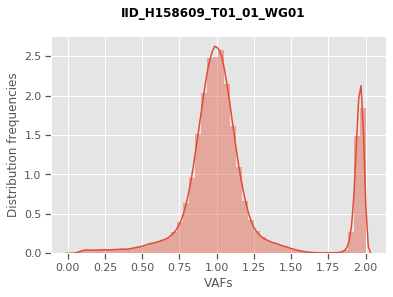

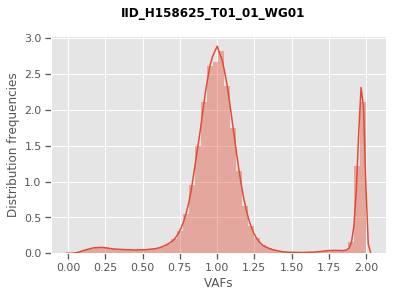

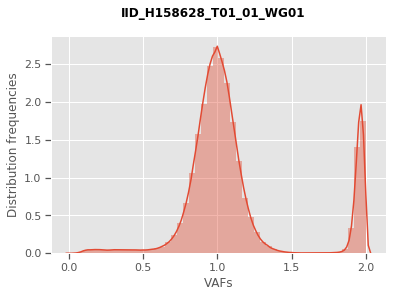

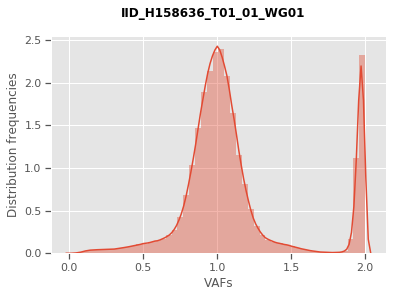

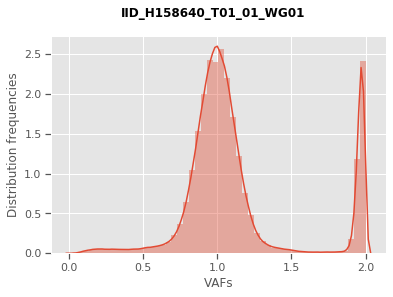

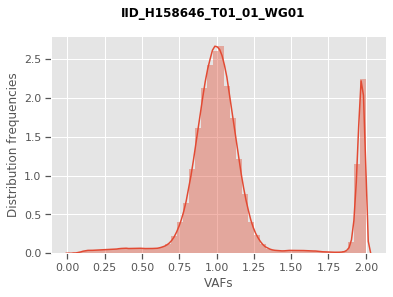

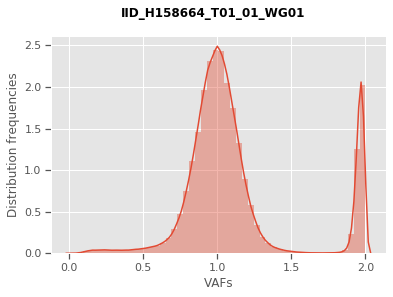

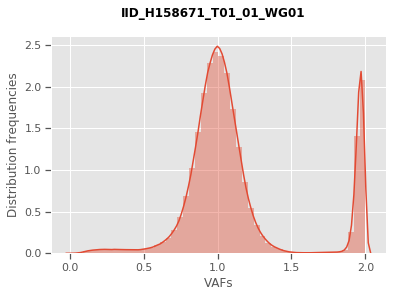

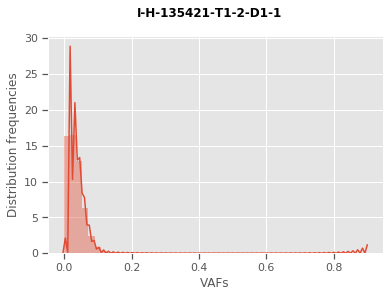

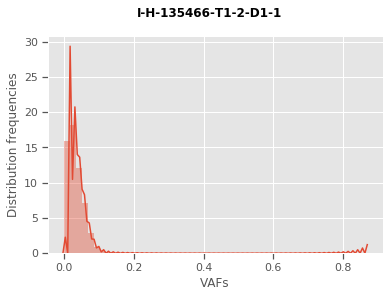

In [14]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[7].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.show()

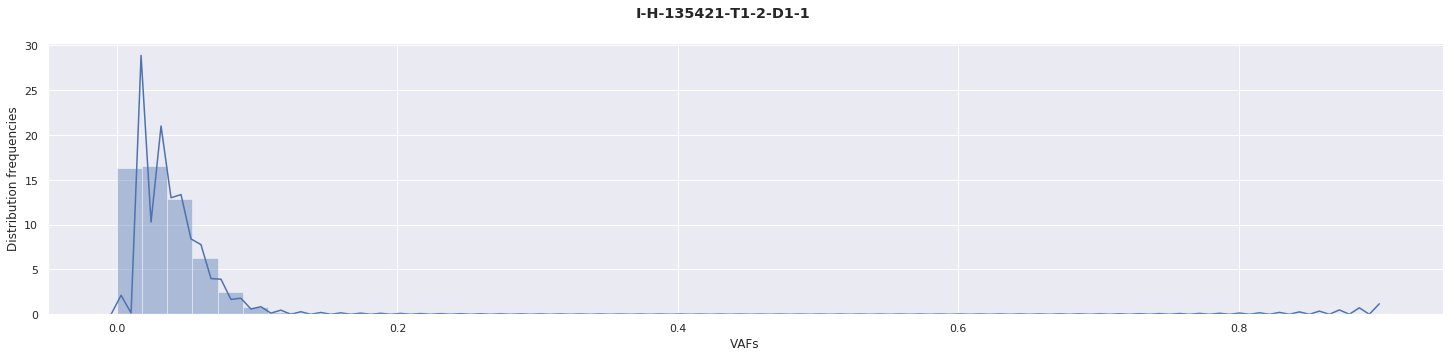

In [16]:
afs='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/I-H-135421-T1-2-D1-1_vs_IID_H156423_N01_01_WG01.snvs.vcf.gz.afs.unique'
tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
bafs=[]
    
for index,line in tsv.iterrows():
    baf=float(line['afs']*2)
    bafs.append(baf)
    
data = np.asarray(bafs)
plt.style.use(style="ggplot")
sns.set(rc={'figure.figsize':(25,5)})
plt.xlabel("VAFs")
plt.ylabel("Distribution frequencies")
name=afs.split('/')[7].split('_vs_')[0]
plt.suptitle(name,weight='bold')
sns.distplot(data)
plt.show()

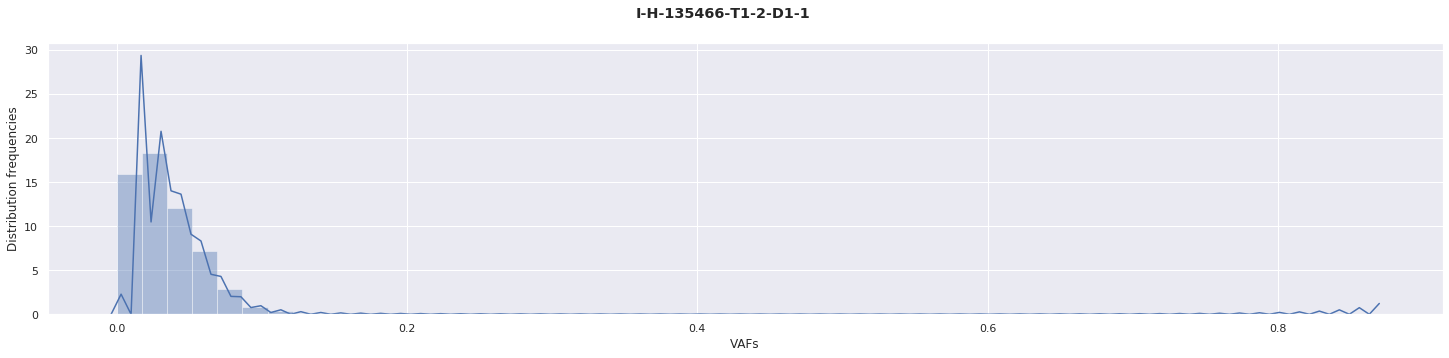

In [17]:
afs='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/I-H-135466-T1-2-D1-1_vs_IID_H156423_N01_01_WG01.snvs.vcf.gz.afs.unique'
tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
bafs=[]
    
for index,line in tsv.iterrows():
    baf=float(line['afs']*2)
    bafs.append(baf)
    
data = np.asarray(bafs)
plt.style.use(style="ggplot")
sns.set(rc={'figure.figsize':(25,5)})
plt.xlabel("VAFs")
plt.ylabel("Distribution frequencies")
name=afs.split('/')[7].split('_vs_')[0]
plt.suptitle(name,weight='bold')
sns.distplot(data)
plt.show()

- 2 last cases compared with Matched Mutect:

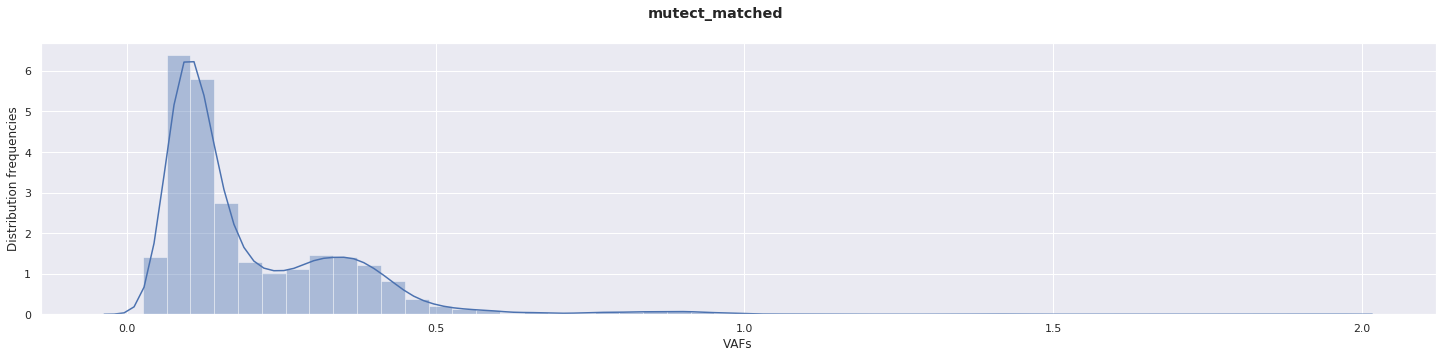

In [19]:
afs='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/mutect_matched/I-H-135421-T1-2-D1-1_vs_I-H-135421-N1-1-D1-1.snvs.vcf.gz.afs.unique'
tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
bafs=[]
    
for index,line in tsv.iterrows():
    baf=float(line['afs']*2)
    bafs.append(baf)
    
data = np.asarray(bafs)
plt.style.use(style="ggplot")
sns.set(rc={'figure.figsize':(25,5)})
plt.xlabel("VAFs")
plt.ylabel("Distribution frequencies")
name=afs.split('/')[7].split('_vs_')[0]
plt.suptitle(name,weight='bold')
sns.distplot(data)
plt.show()

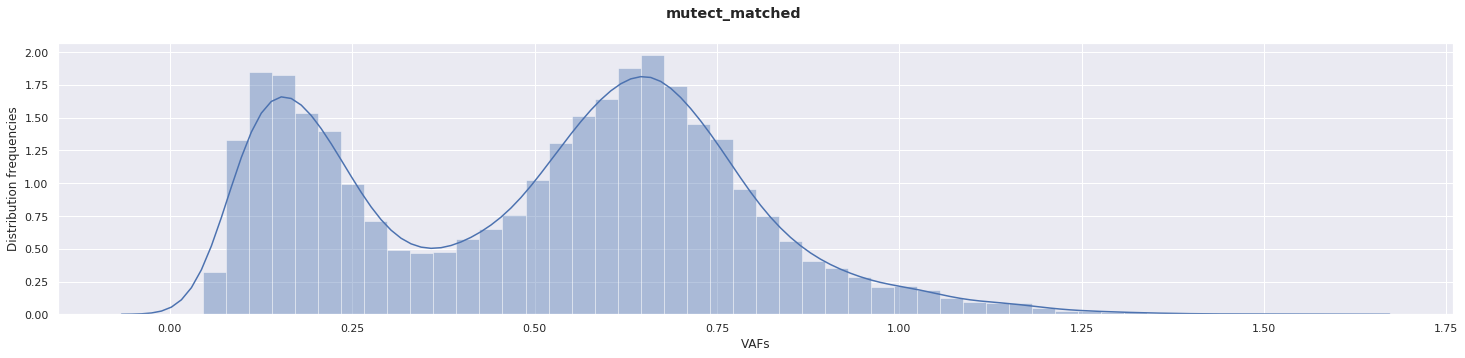

In [20]:
afs='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/mutect_matched/I-H-135466-T1-2-D1-1_vs_I-H-135466-N1-1-D1-1.snvs.vcf.gz.afs.unique'
tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
bafs=[]
    
for index,line in tsv.iterrows():
    baf=float(line['afs']*2)
    bafs.append(baf)
    
data = np.asarray(bafs)
plt.style.use(style="ggplot")
sns.set(rc={'figure.figsize':(25,5)})
plt.xlabel("VAFs")
plt.ylabel("Distribution frequencies")
name=afs.split('/')[7].split('_vs_')[0]
plt.suptitle(name,weight='bold')
sns.distplot(data)
plt.show()

- New Normal:

In [2]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/newND/*.snvs.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/newND/I-H-135421-T1-2-D1-1_vs_I-H-135420-N1-1-D1-1.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/newND/I-H-135466-T1-2-D1-1_vs_I-H-135420-N1-1-D1-1.snvs.vcf.gz.afs.unique']

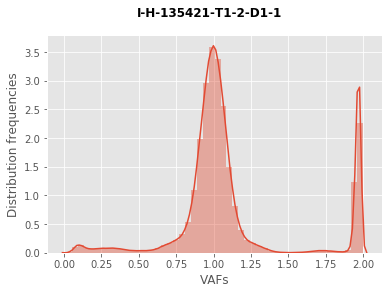

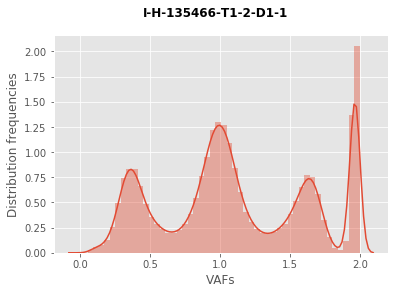

In [9]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.show()

# - Dan's cases:

In [246]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/*.snvs.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.snvs.vcf.gz.afs.unique']

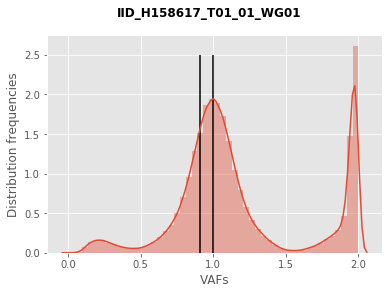

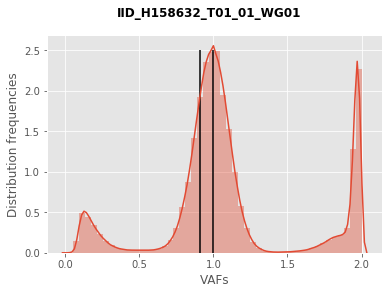

In [247]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

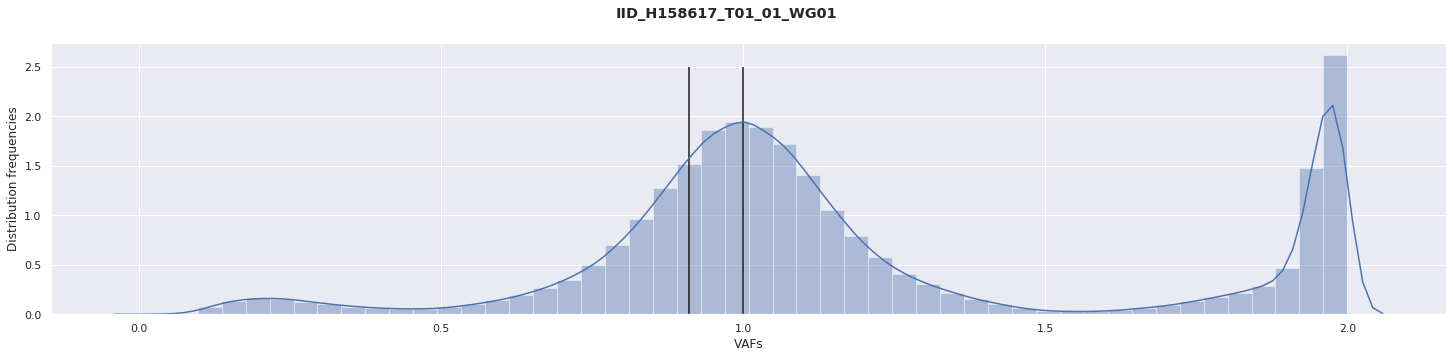

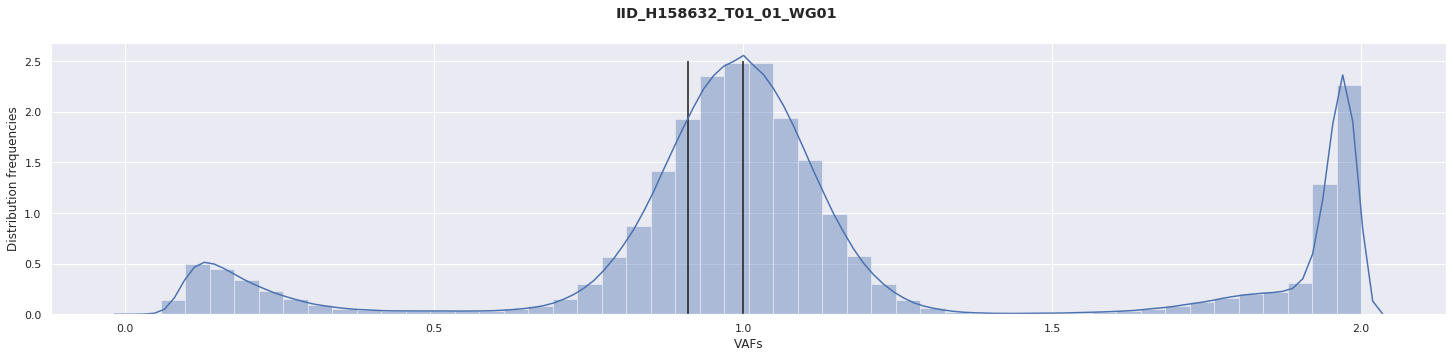

In [248]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()


### - Caveman Flagging:

In [275]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/*_flag/*flagged.vcf.gz'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged.vcf.gz']

In [278]:
vcf=VariantFile(vcfs[0],'rb')
for row in vcf.fetch("1", 13273, 13750):
     print(row)
     print(row.__str__().split('\t')[1])

1	13750	.	C	T	.	clustered_events;mapping_quality;t_lod;MQ;MN;VUM	DP=259;ECNT=4;NLOD=34.56;N_ART_LOD=-2.067;POP_AF=0.003632;P_GERMLINE=-32.1;TLOD=4.61;ASRD=0.93;CLPM=0;ASMD=141	GT:AD:AF:F1R2:F2R1:MBQ:MFRL:MMQ:MPOS:SA_MAP_AF:SA_POST_PROB	0/0:115,0:0.009683:54,0:61,0:0:425,0:0:0:.:.	0/1:130,6:0.067:65,3:65,3:40:505,662:23:20:0,0.04,0.044:0.622,0.0006334,0.377

13750


In [136]:
print(row.__str__().split('\t'),'\n')
print(row.__str__().split('\t')[6])

if (row.__str__().split('\t')[6]=='PASS'):
    print('HEY')

['1', '13750', '.', 'C', 'T', '.', 'clustered_events;mapping_quality;t_lod;MQ;MN;VUM', 'DP=259;ECNT=4;NLOD=34.56;N_ART_LOD=-2.067;POP_AF=0.003632;P_GERMLINE=-32.1;TLOD=4.61;ASRD=0.93;CLPM=0;ASMD=141', 'GT:AD:AF:F1R2:F2R1:MBQ:MFRL:MMQ:MPOS:SA_MAP_AF:SA_POST_PROB', '0/0:115,0:0.009683:54,0:61,0:0:425,0:0:0:.:.', '0/1:130,6:0.067:65,3:65,3:40:505,662:23:20:0,0.04,0.044:0.622,0.0006334,0.377\n'] 

clustered_events;mapping_quality;t_lod;MQ;MN;VUM


In [137]:
#IID_H158617_T01_01_WG01
vcf_in = VariantFile(vcfs[0],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    if(row.__str__().split('\t')[6]=='PASS'):
        vcf_out.write(row)

In [138]:
#IID_H158632_T01_01_WG01
vcf_in = VariantFile(vcfs[1],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    if(row.__str__().split('\t')[6]=='PASS'):
        vcf_out.write(row)

In [250]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/*.flagged_pass.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass.vcf.gz.afs.unique']

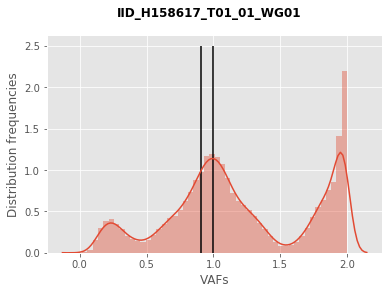

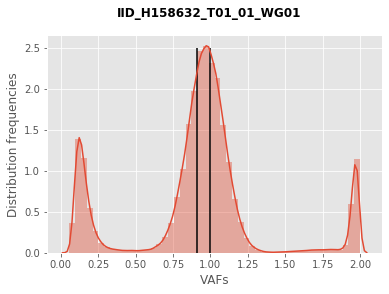

In [216]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

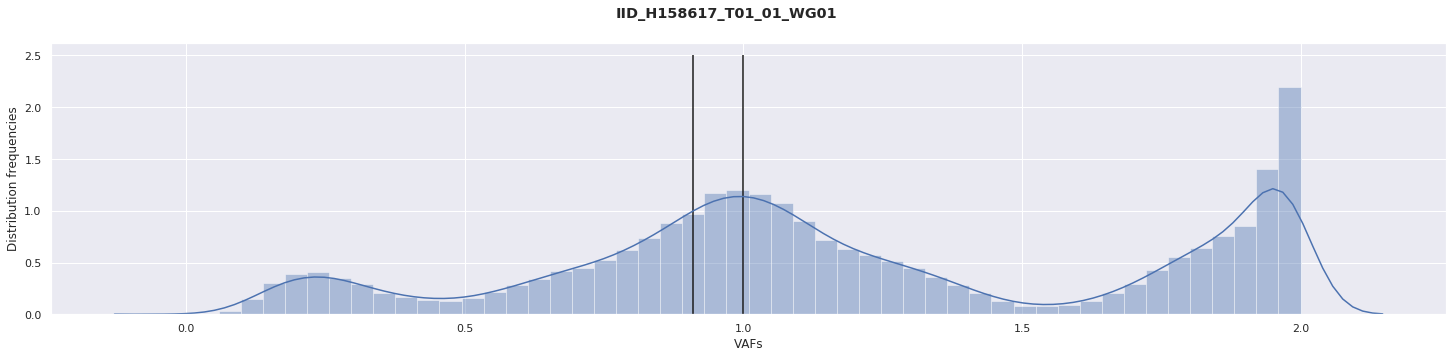

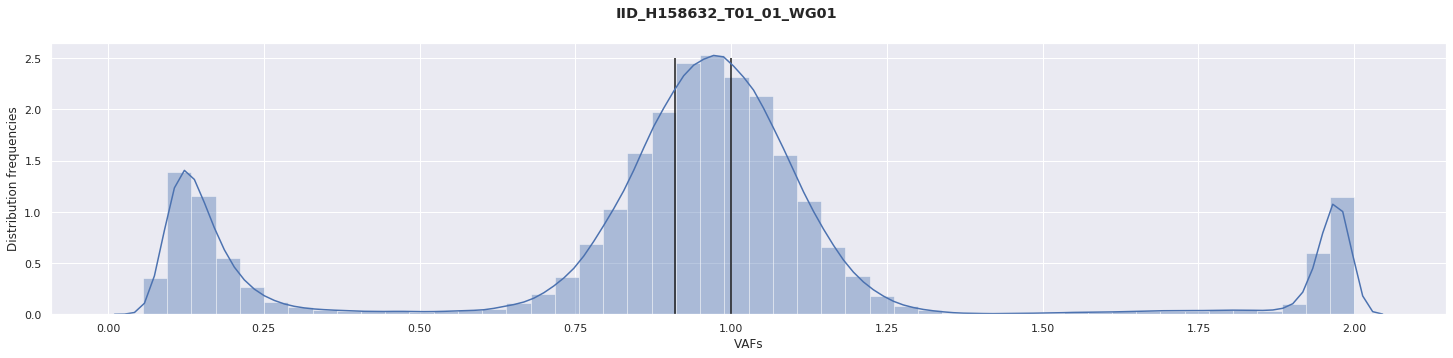

In [251]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show() 


## - dbSNP138

In [123]:
db138='/ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/dbsnp/138/dbsnp_138.b37.vcf.gz'

In [124]:
dbvcf_in=VariantFile(db138,'rb')
dbvcf_out=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz', 'w', header=dbvcf_in.header)

for row in dbvcf_in:
    #print(row.__str__().split('\t')[7])
    if('COMMON=1' in row.__str__().split('\t')[7]):
        if('<' not in row.__str__().split('\t')[4]):
            #print(row)
            dbvcf_out.write(row)

In [139]:
db138_com='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz'

In [140]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/*_flag/*flagged_pass.vcf.gz'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass.vcf.gz']

In [173]:
na=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')
na.fetch('1', 10582, 10583)
print(na)

In [185]:
row=()
na=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')
for row in na.fetch('1', 10582, 10583):
    row.__str__().split('\t')
row.__str__().split('\t')

['1',
 '10583',
 'rs58108140',
 'G',
 'A',
 '.',
 '.',
 'CAF=[0.8558,0.1442];COMMON=1;KGPROD;KGPhase1;OTHERKG;R5;RS=58108140;RSPOS=10583;SAO=0;SSR=0;VC=SNV;VP=0x050000020001100016000100;WGT=1;dbSNPBuildID=129\n']

In [186]:
row=()
na=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')
for row in na.fetch('1', 10584, 10585):
    row.__str__().split('\t')
row.__str__().split('\t')

['()']

In [205]:
#IID_H158617_T01_01_WG01
vcf_in = VariantFile(vcfs[0],'rb')  # auto-detect input format
dbvcf_in=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')

vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    chrom=row.__str__().split('\t')[0]
    pos1=int(row.__str__().split('\t')[1])-1
    pos2=int(row.__str__().split('\t')[1])
        
    if(chrom=='hs37d5'):
        next
    else:
        for row2 in dbvcf_in.fetch(str(chrom), int(pos1), int(pos2)):
            if (((row.__str__().split('\t')[0]==row2.__str__().split('\t')[0]) ) & (int(row.__str__().split('\t')[1])==int(row2.__str__().split('\t')[1]))):
                #print(row.__str__().split('\t')[0],row2.__str__().split('\t')[0],int(row.__str__().split('\t')[1]),int(row2.__str__().split('\t')[1]) )
                vcf_out.write(row)
                

In [207]:
#IID_H158632_T01_01_WG01
vcf_in = VariantFile(vcfs[1],'rb')  # auto-detect input format
dbvcf_in=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')

vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    chrom=row.__str__().split('\t')[0]
    pos1=int(row.__str__().split('\t')[1])-1
    pos2=int(row.__str__().split('\t')[1])
        
    if(chrom=='hs37d5'):
        next
    else:
        for row2 in dbvcf_in.fetch(str(chrom), int(pos1), int(pos2)):
            if (((row.__str__().split('\t')[0]==row2.__str__().split('\t')[0]) ) & (int(row.__str__().split('\t')[1])==int(row2.__str__().split('\t')[1]))):
                #print(row.__str__().split('\t')[0],row2.__str__().split('\t')[0],int(row.__str__().split('\t')[1]),int(row2.__str__().split('\t')[1]) )
                vcf_out.write(row)

- Use of fgrep to filter the variants that have been annotated as common in dbSNP.

In [209]:
vcf=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz','rb')
for row in vcf.fetch("1", 138564, 138565):
     print(row)

1	138565	.	G	A	.	PASS	DP=199;ECNT=1;NLOD=29.16;N_ART_LOD=-1.995;POP_AF=0.006894;P_GERMLINE=-25.02;TLOD=74.31;ASRD=0.97;CLPM=0;ASMD=146	GT:AD:AF:F1R2:F2R1:MBQ:MFRL:MMQ:MPOS:SA_MAP_AF:SA_POST_PROB	0/0:97,0:0.011:40,0:57,0:0:412,0:0:0:.:.	0/1:70,28:0.289:32,18:38,10:43:524,672:41:20:0.263,0.263,0.286:0.018,0.013,0.969



In [210]:
vcf=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz','rb')
for row in vcf.fetch("1", 16140, 16141):
     print(row)

1	16141	.	C	T	.	PASS	DP=181;ECNT=2;NLOD=23.76;N_ART_LOD=-1.912;POP_AF=0.003915;P_GERMLINE=-19.87;TLOD=54.12;ASRD=0.97;CLPM=0;ASMD=146	GT:AD:AF:F1R2:F2R1:MBQ:MFRL:MMQ:MPOS:SA_MAP_AF:SA_POST_PROB	0/0:79,0:0.025:42,0:37,0:0:451,0:0:0:.:.	0/1:73,21:0.234:40,10:33,11:37:506,524:45:51:0.182,0.212,0.223:0.024,0.009958,0.966



In [252]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/*.flagged_pass_dbsnp_filter_header.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz.afs.unique']

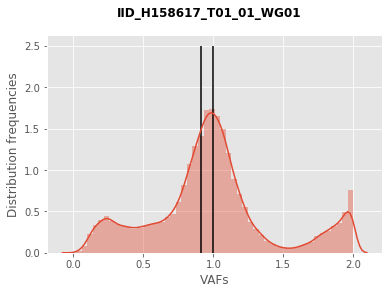

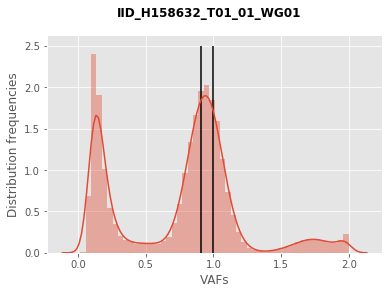

In [214]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

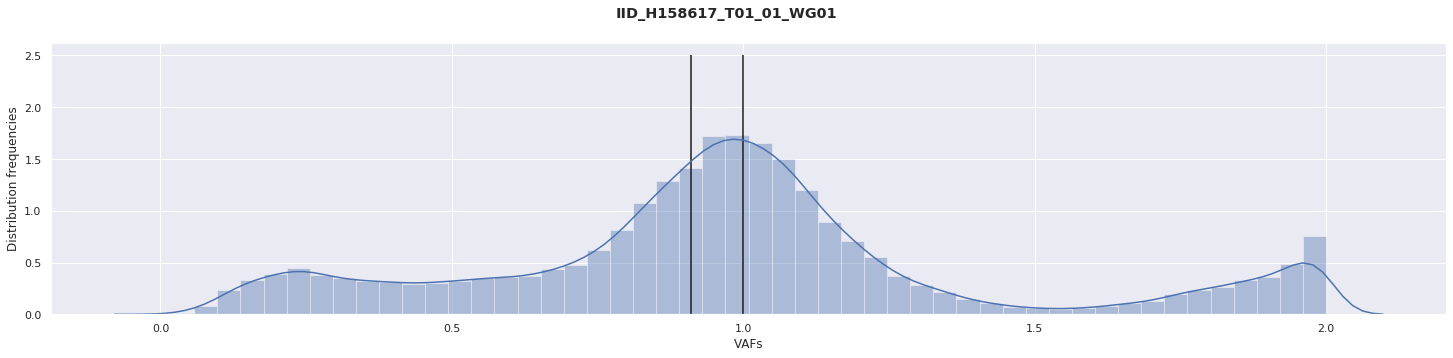

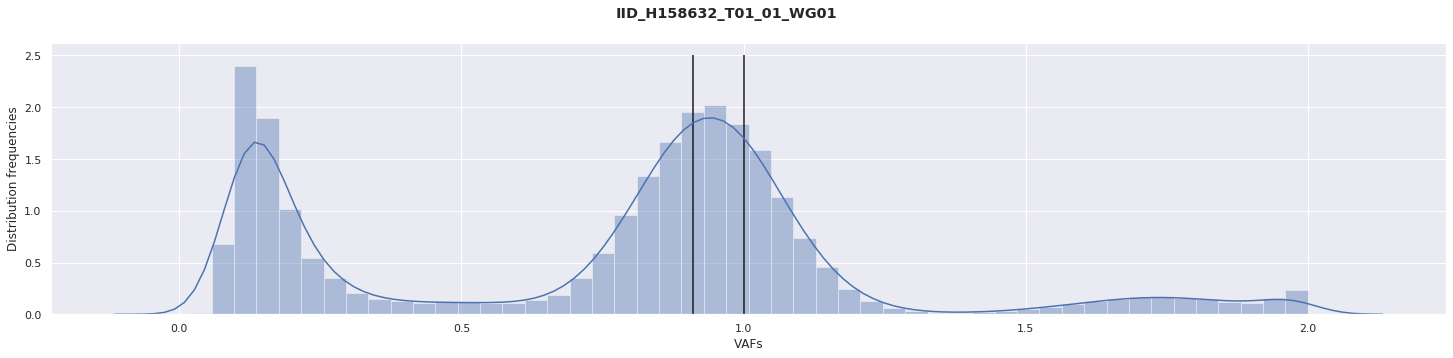

In [253]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()    


### EXOME coordinates:

In [21]:
import pysam

In [22]:
from pysam import VariantFile

- Exome bed:

In [219]:
EXOME_BED = pd.read_csv("/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/exome/GRCh37_EXON.bed_chrs.bed",sep='\t',header=None, names=['chr','start','end','name','num','strand'])

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [220]:
EXOME_BED.head()

,chr,start,end,name,num,strand
0,1,11873,12227,uc001aaa.3_exon_0_0_chr1_11874_f,0,+
1,1,11873,12227,uc010nxq.1_exon_0_0_chr1_11874_f,0,+
2,1,11873,12227,uc010nxr.1_exon_0_0_chr1_11874_f,0,+
3,1,12594,12721,uc010nxq.1_exon_1_0_chr1_12595_f,0,+
4,1,12612,12721,uc001aaa.3_exon_1_0_chr1_12613_f,0,+


In [224]:
EXOME_BED_coor=EXOME_BED[['chr','start','end']].drop_duplicates()

In [225]:
EXOME_BED_coor.head()

,chr,start,end
0,1,11873,12227
3,1,12594,12721
4,1,12612,12721
5,1,12645,12697
6,1,13220,14409


- fetch:

In [230]:
vcf17='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz'
vcf32='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz'

In [237]:
#IID_H158617_T01_01_WG01
vcf_in = VariantFile(vcf17,'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_ex.vcf.gz', 'w', header=vcf_in.header)

for index,row in EXOME_BED_coor.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [243]:
#IID_H158632_T01_01_WG01
vcf_in = VariantFile(vcf32,'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_ex2.vcf.gz', 'w', header=vcf_in.header)

for index,row in EXOME_BED_coor.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [254]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/*.flagged_pass_dbsnp_filter_header_ex.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_ex.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_ex.vcf.gz.afs.unique']

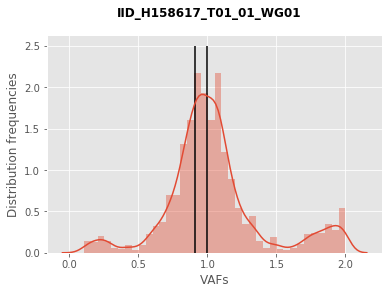

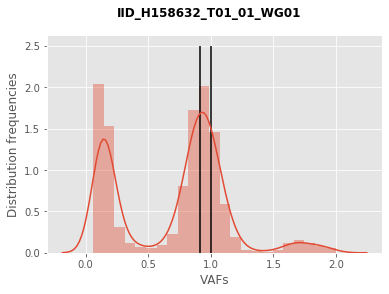

In [245]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

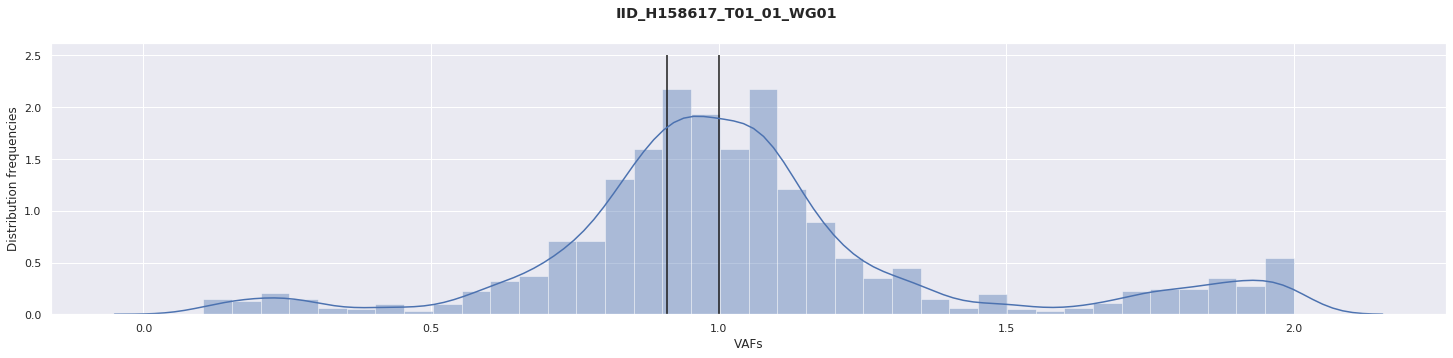

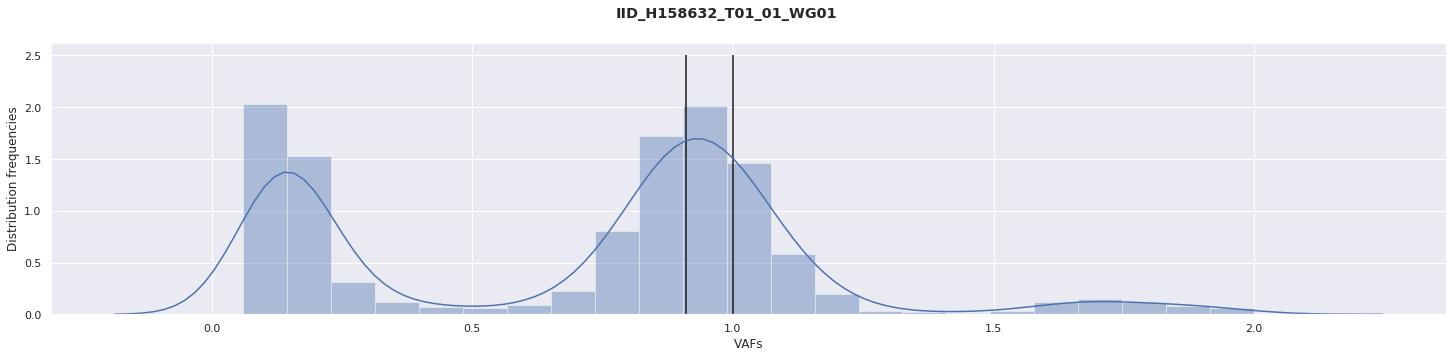

In [255]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()    


### - GENES:

In [256]:
GENES_BED = pd.read_csv("/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/Human.GRCh37.gene_regions.bed",sep='\t',header=None, names=['chr','start','end'])

In [257]:
GENES_BED.head()

,chr,start,end
0,1,24553,41081
1,1,64090,75008
2,1,84294,178862
3,1,222614,272253
4,1,312719,466954


- fetch: I don't know why but with pysam there are at least two times the number of launchings of the same window in order to obtain the vcf with pysam.

In [258]:
vcf17='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz'
vcf32='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz'

In [261]:
#IID_H158617_T01_01_WG01
vcf_in = VariantFile(vcf17,'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [264]:
#IID_H158632_T01_01_WG01
vcf_in = VariantFile(vcf32,'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [265]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/*.flagged_pass_dbsnp_filter_header_genes.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_genes.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_genes.vcf.gz.afs.unique']

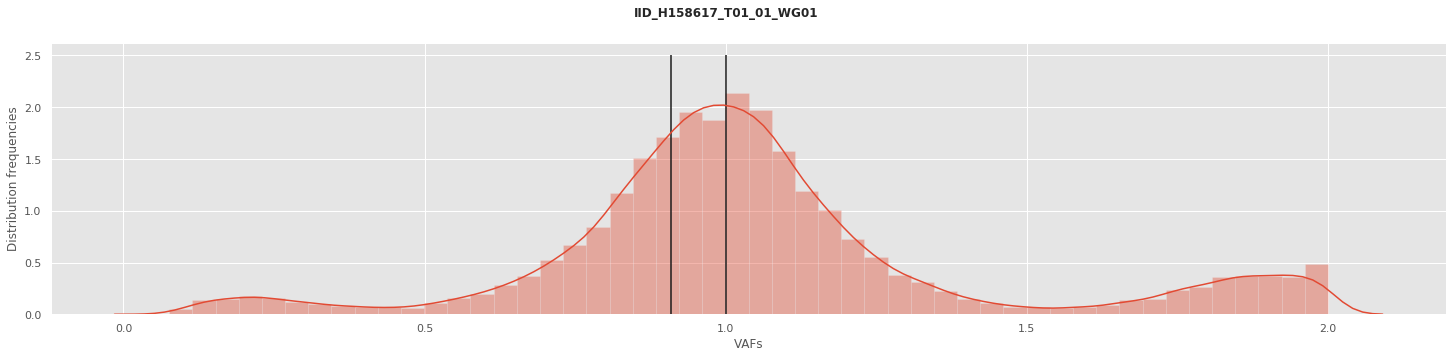

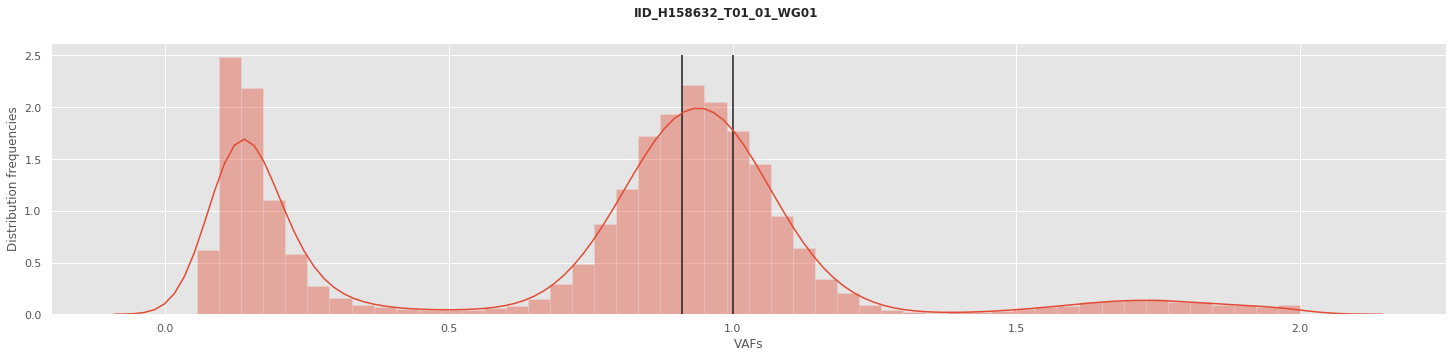

In [266]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

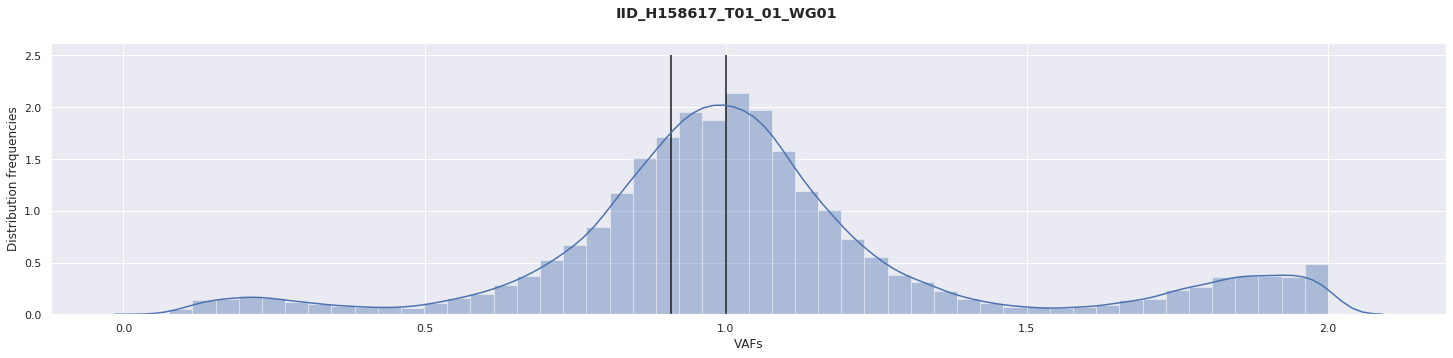

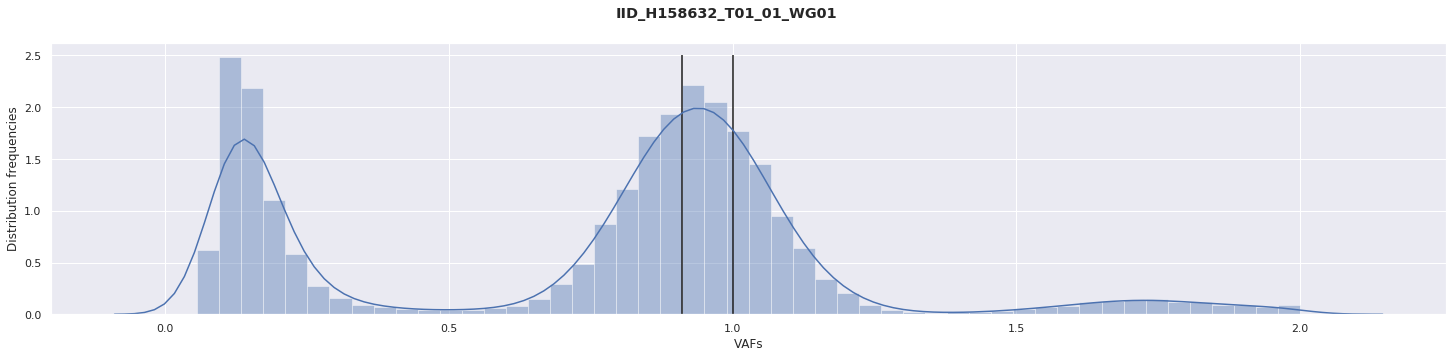

In [267]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()    


# - IGs:

In [293]:
#IG loci:

igk=['2',89156874,90274235]        #chr2:89156874-90274235
igh=['14',106052774,107288051]     #chr14:106052774-107288051
igl=['22',22380474,23265085]       #chr22:22380474-23265085


In [294]:
GENES_BED = pd.read_csv("/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/Human.GRCh37.gene_regions.bed",sep='\t',header=None, names=['chr','start','end'])

In [295]:
GENES_BED.head()

,chr,start,end
0,1,24553,41081
1,1,64090,75008
2,1,84294,178862
3,1,222614,272253
4,1,312719,466954


In [296]:
GENES_BED_IGs=GENES_BED.copy()
GENES_BED_IGs.loc[len(GENES_BED_IGs)] = igk
GENES_BED_IGs.loc[len(GENES_BED_IGs)] = igh
GENES_BED_IGs.loc[len(GENES_BED_IGs)] = igl
GENES_BED_IGs.tail()

,chr,start,end
15766,Y,28070125,28080289
15767,Y,28502135,28512239
15768,2,89156874,90274235
15769,14,106052774,107288051
15770,22,22380474,23265085


In [304]:
GENES_BED_IGs[GENES_BED_IGs['chr']=='14'].tail(20)

,chr,start,end
4711,14,105386159,105466849
4712,14,105470909,105492485
4713,14,105510727,105536767
4714,14,105554945,105570341
4715,14,105602317,105652640
4716,14,105670622,105869484
4717,14,105881158,105970912
4718,14,105987939,106001539
4719,14,106059027,106076694
4720,14,106105832,106120394


- fetch: I don't know why but with pysam there are at least two times the number of launchings of the same window in order to obtain the vcf with pysam.

In [288]:
vcf17='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz'
vcf32='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz'

In [302]:
#IID_H158617_T01_01_WG01
vcf_in = VariantFile(vcf17,'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_genes_igs.vcf.gz', 'w', header=vcf_in.header)

keys=[]
for index,row in GENES_BED_IGs.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        key=read.__str__().split('\t')[0]+'_'+str(read.__str__().split('\t')[1])
        if (key not in keys):
            vcf_out.write(read)
            keys.append(key)

In [305]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/*.flagged_pass_dbsnp_filter_header_genes_igs.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_genes_igs.vcf.gz.afs.unique']

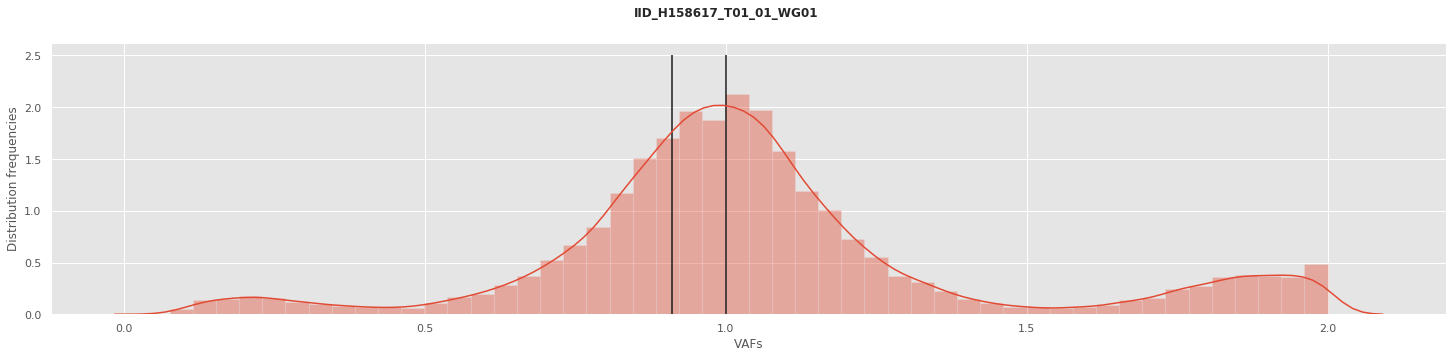

In [306]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

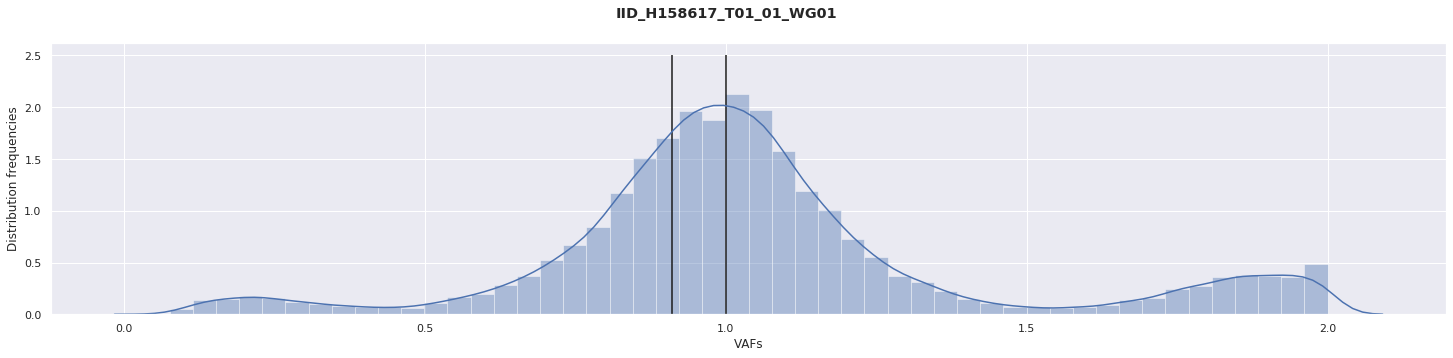

In [307]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()    


## - IGs only-analysis:

In [45]:
#IG loci:
igk=['2',89156874,90274235]        #chr2:89156874-90274235
igh=['14',106052774,107288051]     #chr14:106052774-107288051
igl=['22',22380474,23265085]       #chr22:22380474-23265085

In [57]:
chrs=['2','14','22']
start=[89156874,106052774,22380474]
end=[90274235,107288051,23265085]

In [63]:
GENES_BED_IGs=pd.DataFrame(list(zip(chrs, start, end)),columns=['chrs','start', 'end'])

In [64]:
GENES_BED_IGs.head()

,chrs,start,end
0,2,89156874,90274235
1,14,106052774,107288051
2,22,22380474,23265085


- fetch: I don't know why but with pysam there are at least two times the number of launchings of the same window in order to obtain the vcf with pysam.

In [77]:
vcf17='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz'

In [78]:
#IID_H158617_T01_01_WG01
vcf_in = VariantFile(vcf17,'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_onlyIGs.vcf.gz', 'w', header=vcf_in.header)

keys=[]
for index,row in GENES_BED_IGs.iterrows():
    for read in vcf_in.fetch(contig=str(row['chrs']), start=int(row['start']), end=int(row['end'])):
        key=read.__str__().split('\t')[0]+'_'+str(read.__str__().split('\t')[1])
        if (key not in keys):
            vcf_out.write(read)
            keys.append(key)

In [305]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/*.flagged_pass_dbsnp_filter_header_genes_igs.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_genes_igs.vcf.gz.afs.unique']

# - IGs analysis with PASS + noPASS IGs mutations:

In [69]:
#IG loci:
igk=['2',89156874,90274235]        #chr2:89156874-90274235
igh=['14',106052774,107288051]     #chr14:106052774-107288051
igl=['22',22380474,23265085]       #chr22:22380474-23265085

In [70]:
chrs=['2','14','22']
start=[89156874,106052774,22380474]
end=[90274235,107288051,23265085]

In [71]:
GENES_BED_IGs=pd.DataFrame(list(zip(chrs, start, end)),columns=['chrs','start', 'end'])

In [72]:
GENES_BED_IGs.head()

,chrs,start,end
0,2,89156874,90274235
1,14,106052774,107288051
2,22,22380474,23265085


- fetch: I don't know why but with pysam there are at least two times the number of launchings of the same window in order to obtain the vcf with pysam.

In [75]:
vcf17_WGS_igs_noFLAGs_noSNPs='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/WGS_IGs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs_dbsnp_filter_2sigs_pass_header.vcf.gz'

In [80]:
#IID_H158617_T01_01_WG01
vcf_in = VariantFile(vcf17_WGS_igs_noFLAGs_noSNPs,'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs_dbsnp_filter_2sigs_pass_header_onlyIGs.vcf.gz', 'w', header=vcf_in.header)

keys=[]
for index,row in GENES_BED_IGs.iterrows():
    for read in vcf_in.fetch(contig=str(row['chrs']), start=int(row['start']), end=int(row['end'])):
        key=read.__str__().split('\t')[0]+'_'+str(read.__str__().split('\t')[1])
        if (key not in keys):
            vcf_out.write(read)
            keys.append(key)

# - IGs with no Caveman-flagging & dbSNP filtering:

Do not filter by Caveman-Tagging or dbSNP anything localised in IGs-loci.

In [308]:
#IG loci:
igk=['2',89156874,90274235]        #chr2:89156874-90274235
igh=['14',106052774,107288051]     #chr14:106052774-107288051
igl=['22',22380474,23265085]       #chr22:22380474-23265085

- Caveman-flagging:

In [324]:
#IID_H158617_T01_01_WG01
vcf_in = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged.vcf.gz','rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    if(row.__str__().split('\t')[6]=='PASS'):
        vcf_out.write(row)
    else:
        chrom=row.__str__().split('\t')[0]
        pos=int(row.__str__().split('\t')[1])
    
        if((chrom=='2') & (pos>=89156874) & (pos<=90274235)):
            vcf_out.write(row)
        if((chrom=='14') & (pos>=106052774) & (pos<=107288051)):
            vcf_out.write(row)
        if((chrom=='22') & (pos>=22380474) & (pos<=23265085)):
            vcf_out.write(row)

- dbSNP:

In [333]:
db138_com='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz'

In [334]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/*_flag/*flagged_pass_igs.vcf.gz'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs.vcf.gz']

In [338]:
#IID_H158617_T01_01_WG01
vcf_in = VariantFile(vcfs[0],'rb')  # auto-detect input format
dbvcf_in=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')

vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs_dbsnp.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    chrom=row.__str__().split('\t')[0]
    pos1=int(row.__str__().split('\t')[1])-1
    pos2=int(row.__str__().split('\t')[1])
        
    if((chrom=='hs37d5') | ( (chrom=='2') & (pos1>=89156874) & (pos1<=90274235) ) | ((chrom=='14') & (pos1>=106052774) & (pos1<=107288051)) | ((chrom=='22') & (pos1>=22380474) & (pos1<=23265085)) ) :
        next
    else:
        for row2 in dbvcf_in.fetch(str(chrom), int(pos1), int(pos2)):
            if (((row.__str__().split('\t')[0]==row2.__str__().split('\t')[0]) ) & (int(row.__str__().split('\t')[1])==int(row2.__str__().split('\t')[1]))):
                #print(row.__str__().split('\t')[0],row2.__str__().split('\t')[0],int(row.__str__().split('\t')[1]),int(row2.__str__().split('\t')[1]) )
                vcf_out.write(row)
                

- Use of fgrep to filter the variants that have been annotated as common in dbSNP.

In [339]:
vcf=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs_dbsnp_filter.vcf.gz','rb')
for row in vcf.fetch("1", 138564, 138565):
     print(row)

1	138565	.	G	A	.	PASS	DP=199;ECNT=1;NLOD=29.16;N_ART_LOD=-1.995;POP_AF=0.006894;P_GERMLINE=-25.02;TLOD=74.31;ASRD=0.97;CLPM=0;ASMD=146	GT:AD:AF:F1R2:F2R1:MBQ:MFRL:MMQ:MPOS:SA_MAP_AF:SA_POST_PROB	0/0:97,0:0.011:40,0:57,0:0:412,0:0:0:.:.	0/1:70,28:0.289:32,18:38,10:43:524,672:41:20:0.263,0.263,0.286:0.018,0.013,0.969



In [340]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs_dbsnp_filter.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs_dbsnp_filter.vcf.gz.afs.unique']

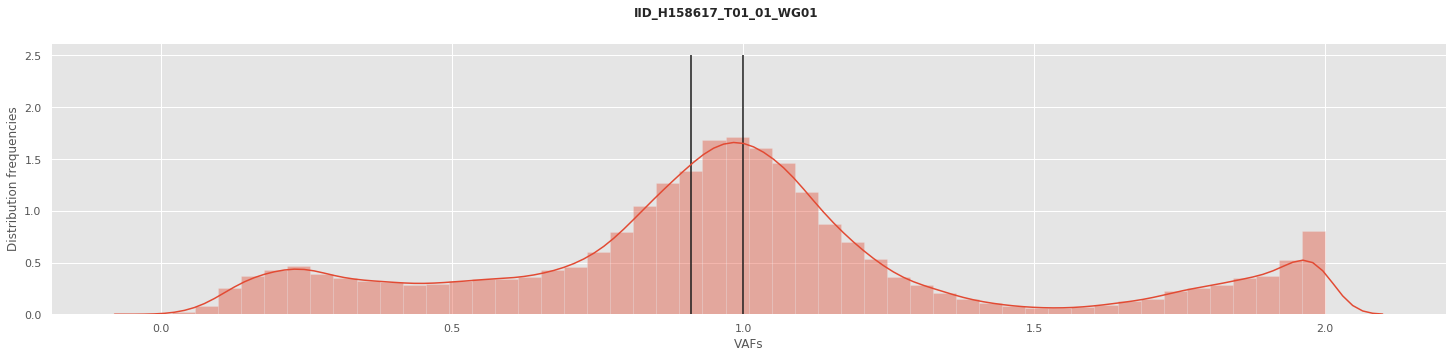

In [341]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

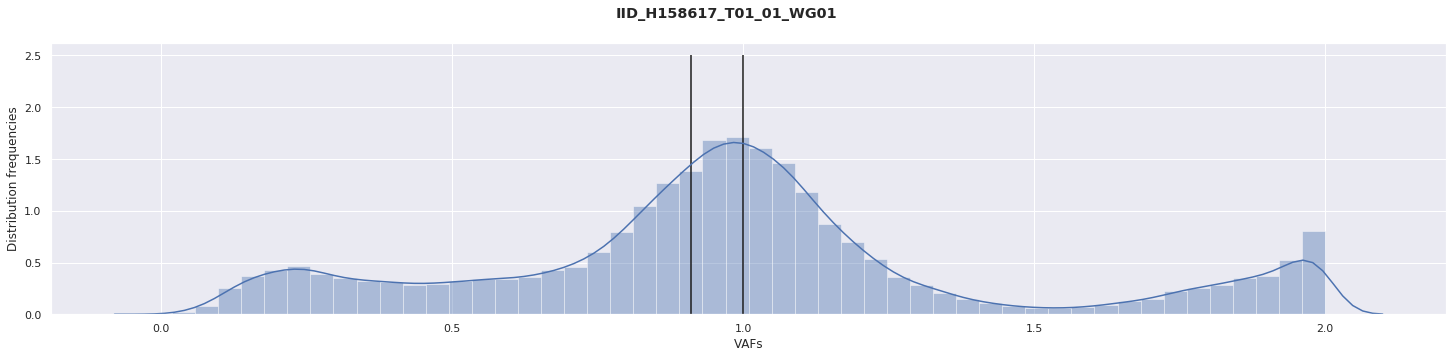

In [342]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()    


- Genes+Igs:

In [343]:
#IG loci:

igk=['2',89156874,90274235]        #chr2:89156874-90274235
igh=['14',106052774,107288051]     #chr14:106052774-107288051
igl=['22',22380474,23265085]       #chr22:22380474-23265085

In [344]:
GENES_BED = pd.read_csv("/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/Human.GRCh37.gene_regions.bed",sep='\t',header=None, names=['chr','start','end'])

In [345]:
GENES_BED.head()

,chr,start,end
0,1,24553,41081
1,1,64090,75008
2,1,84294,178862
3,1,222614,272253
4,1,312719,466954


In [346]:
GENES_BED_IGs=GENES_BED.copy()
GENES_BED_IGs.loc[len(GENES_BED_IGs)] = igk
GENES_BED_IGs.loc[len(GENES_BED_IGs)] = igh
GENES_BED_IGs.loc[len(GENES_BED_IGs)] = igl
GENES_BED_IGs.tail()

,chr,start,end
15766,Y,28070125,28080289
15767,Y,28502135,28512239
15768,2,89156874,90274235
15769,14,106052774,107288051
15770,22,22380474,23265085


In [347]:
GENES_BED_IGs[GENES_BED_IGs['chr']=='14'].tail(20)

,chr,start,end
4711,14,105386159,105466849
4712,14,105470909,105492485
4713,14,105510727,105536767
4714,14,105554945,105570341
4715,14,105602317,105652640
4716,14,105670622,105869484
4717,14,105881158,105970912
4718,14,105987939,106001539
4719,14,106059027,106076694
4720,14,106105832,106120394


- fetch: I don't know why but with pysam there are at least two times the number of launchings of the same window in order to obtain the vcf with pysam.

In [350]:
vcf17='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs_dbsnp_filter.vcf.gz'

In [352]:
#IID_H158617_T01_01_WG01
vcf_in = VariantFile(vcf17,'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs_dbsnp_filter_genes_igs.vcf.gz', 'w', header=vcf_in.header)

keys=[]
for index,row in GENES_BED_IGs.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        key=read.__str__().split('\t')[0]+'_'+str(read.__str__().split('\t')[1])
        if (key not in keys):
            vcf_out.write(read)
            keys.append(key)

In [353]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs_dbsnp_filter_genes_igs.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_igs_dbsnp_filter_genes_igs.vcf.gz.afs.unique']

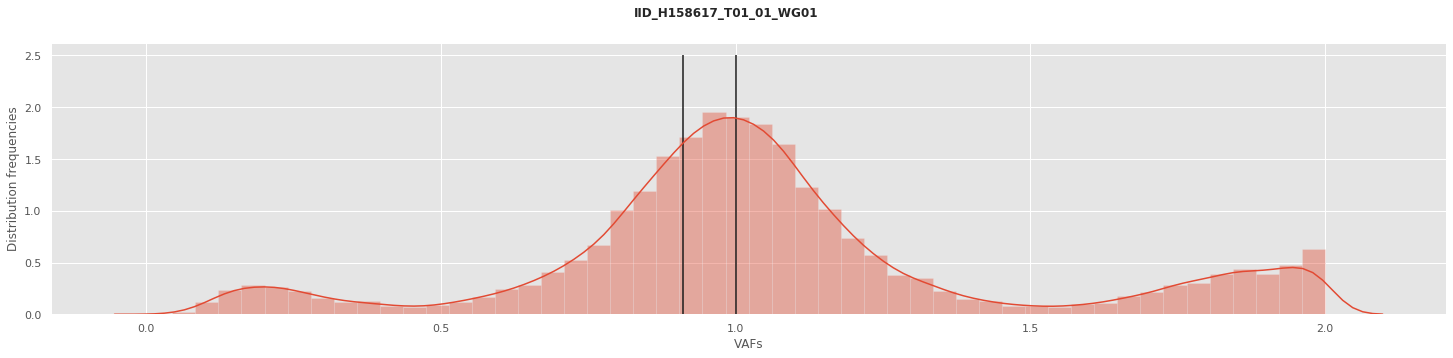

In [354]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

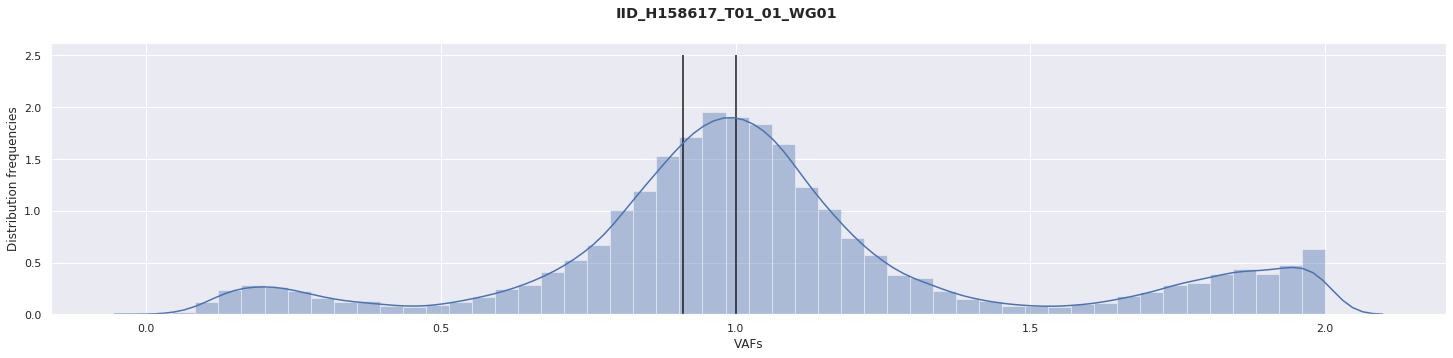

In [355]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()    


# - All cases: 8 examples

In [1]:
import isabl_cli as ii
import os

- mutects:

In [6]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/*/mutect/*.snvs.vcf.gz'
mutects=!ls -v {path}

#Delete the two samples that are in /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/newND (I-H-135421-T1-2-D1-1,I-H-135466-T1-2-D1-1)
del mutects[8:10]
mutects

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158609_T01_01_WG01/mutect/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158625_T01_01_WG01/mutect/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158628_T01_01_WG01/mutect/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158636_T01_01_WG01/mutect/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158640_T01_01_WG01/mutect/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158646_T01_01_WG01/mutect/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158664_T01_01_WG01/mutect/IID_H158664_T01_01_WG01_vs_II

In [24]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/newND/*/mutect/*.snvs.vcf.gz'
mutects2=!ls -v {path}
mutects2

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/newND/I-H-135421-T1-2-D1-1/mutect/I-H-135421-T1-2-D1-1_vs_I-H-135420-N1-1-D1-1.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/newND/I-H-135466-T1-2-D1-1/mutect/I-H-135466-T1-2-D1-1_vs_I-H-135420-N1-1-D1-1.snvs.vcf.gz']

- samples:

In [7]:
samples=[]
for n in mutects:
    name=n.split('/')[7]
    samples.append(name)
samples

['IID_H158609_T01_01_WG01',
 'IID_H158625_T01_01_WG01',
 'IID_H158628_T01_01_WG01',
 'IID_H158636_T01_01_WG01',
 'IID_H158640_T01_01_WG01',
 'IID_H158646_T01_01_WG01',
 'IID_H158664_T01_01_WG01',
 'IID_H158671_T01_01_WG01']

In [29]:
samples2=[]
for n in mutects2:
    name=n.split('/')[8]
    samples2.append(name)
samples2

['I-H-135421-T1-2-D1-1', 'I-H-135466-T1-2-D1-1']

- bams:

In [8]:
bams=[]
for n in samples:
    bam = ii.Experiment(n).bam_files.GRCh37.url
    bams.append(bam)
bams

['/work/isabl/data/analyses/29/48/252948/IID_H158609_T01_01_WG01.bam',
 '/work/isabl/data/analyses/29/80/252980/IID_H158625_T01_01_WG01.bam',
 '/work/isabl/data/analyses/29/86/252986/IID_H158628_T01_01_WG01.bam',
 '/work/isabl/data/analyses/34/25/253425/IID_H158636_T01_01_WG01.bam',
 '/work/isabl/data/analyses/34/33/253433/IID_H158640_T01_01_WG01.bam',
 '/work/isabl/data/analyses/34/41/253441/IID_H158646_T01_01_WG01.bam',
 '/work/isabl/data/analyses/01/40/260140/IID_H158664_T01_01_WG01.bam',
 '/work/isabl/data/analyses/01/63/260163/IID_H158671_T01_01_WG01.bam']

In [35]:
bams2=[]
for n in samples2:
    bam = ii.Experiment(n).bam_files.GRCh37.url
    bams2.append(bam)
bams2

['/work/isabl/data/analyses/34/04/163404/I-H-135421-T1-2-D1-1.bam',
 '/work/isabl/data/analyses/38/66/163866/I-H-135466-T1-2-D1-1.bam']

- toil_command:

In [9]:
#lines=[]
for index,n in enumerate(mutects):
    name=n.split('/')[7]
    path=os.path.dirname(n)+'/'
    route='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/'
    
    command='bsub -e '+route+name+'.err -o '+route+name+'.out -W 10000 -M 20 -n 5 /work/isabl/bin/toil_cvflag_v0.3.0 '+route+name+'_jobstore --vcf '+n+' --out '+route+name+'_vs_IID_H158604_N01_01_WG01.snvs_flag.vcf.gz --normal-bam /work/isabl/data/analyses/29/39/252939/IID_H158604_N01_01_WG01.bam --tumor-bam ' +bams[index]+' --bedFileLoc /ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/caveman/flagging/ --indelBed /ifs/work/leukgen/ref/defaults/flagging/pindel.germline.bed --unmatchedVCFLoc /ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/caveman/unmatched_normal_panel_bwamem_mapped --annoBedLoc /ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/vagrent --sequencing-method WGS --bin-size 100000 --reference /work/isabl/ref/homo_sapiens/GRCh37d5/gr37.fasta &'                                    
    
    
    print(command,'\n')
    #lines.append(command)
    
    #with open('/work/isabl/home/gutierj2/uk_all/GRIDDS_unmatched/universal_normal/gridss_commands.sh', 'a') as the_file:
        #the_file.write(command)

bsub -e /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01.err -o /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01.out -W 10000 -M 20 -n 5 /work/isabl/bin/toil_cvflag_v0.3.0 /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_jobstore --vcf /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158609_T01_01_WG01/mutect/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz --out /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag.vcf.gz --normal-bam /work/isabl/data/analyses/29/39/252939/IID_H158604_N01_01_WG01.bam --tumor-bam /work/isabl/data/analyses/29/48/252948/IID_H158609_T01_01_WG01.bam --bedFileLoc /ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/caveman/flagging/ --indelBed /ifs/work/leukgen/ref/defaults/flagging/pindel.germline.bed --unmatchedVCFLoc /ifs/work/leukgen/ref/homo_sapiens

In [38]:
#lines=[]
for index,n in enumerate(mutects2):
    name=n.split('/')[8]
    path=os.path.dirname(n)+'/'
    route='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/'
    
    command='bsub -e '+route+name+'.err -o '+route+name+'.out -W 10000 -M 20 -n 5 /work/isabl/bin/toil_cvflag_v0.3.0 '+route+name+'_jobstore --vcf '+n+' --out '+route+name+'_vs_IID_H158604_N01_01_WG01.snvs_flag.vcf.gz --normal-bam /work/isabl/data/analyses/34/45/163445/I-H-135420-N1-1-D1-1.bam --tumor-bam ' +bams2[index]+' --bedFileLoc /ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/caveman/flagging/ --indelBed /ifs/work/leukgen/ref/defaults/flagging/pindel.germline.bed --unmatchedVCFLoc /ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/caveman/unmatched_normal_panel_bwamem_mapped --annoBedLoc /ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/vagrent --sequencing-method WGS --bin-size 100000 --reference /work/isabl/ref/homo_sapiens/GRCh37d5/gr37.fasta &'                                    
    
    
    print(command,'\n')
    #lines.append(command)
    
    #with open('/work/isabl/home/gutierj2/uk_all/GRIDDS_unmatched/universal_normal/gridss_commands.sh', 'a') as the_file:
        #the_file.write(command)

bsub -e /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/I-H-135421-T1-2-D1-1.err -o /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/I-H-135421-T1-2-D1-1.out -W 10000 -M 20 -n 5 /work/isabl/bin/toil_cvflag_v0.3.0 /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/I-H-135421-T1-2-D1-1_jobstore --vcf /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/newND/I-H-135421-T1-2-D1-1/mutect/I-H-135421-T1-2-D1-1_vs_I-H-135420-N1-1-D1-1.snvs.vcf.gz --out /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/I-H-135421-T1-2-D1-1_vs_IID_H158604_N01_01_WG01.snvs_flag.vcf.gz --normal-bam /work/isabl/data/analyses/34/45/163445/I-H-135420-N1-1-D1-1.bam --tumor-bam /work/isabl/data/analyses/34/04/163404/I-H-135421-T1-2-D1-1.bam --bedFileLoc /ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/caveman/flagging/ --indelBed /ifs/work/leukgen/ref/defaults/flagging/pindel.germline.bed --unmatchedVCFLoc /ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/caveman/unm

# - Plot Distributions:

In [10]:
mutects

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158609_T01_01_WG01/mutect/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158625_T01_01_WG01/mutect/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158628_T01_01_WG01/mutect/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158636_T01_01_WG01/mutect/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158640_T01_01_WG01/mutect/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158646_T01_01_WG01/mutect/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158664_T01_01_WG01/mutect/IID_H158664_T01_01_WG01_vs_II

In [13]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/*.snvs.vcf.gz.afs.unique'
uniques=!ls -v {path}
del uniques[8:10]
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158664_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/IID_H158671_T01_01_WG01_vs_IID_H158604_N01_01_WG01.s

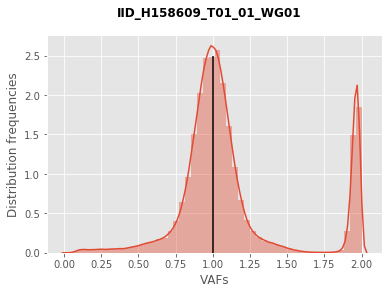

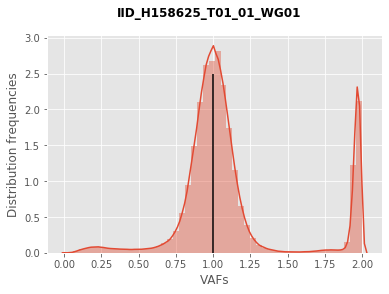

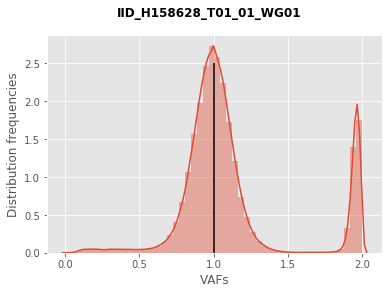

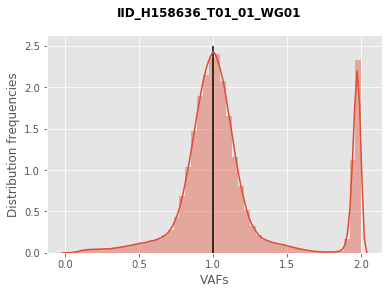

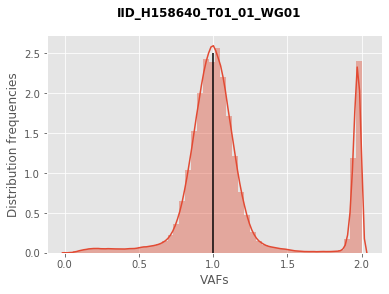

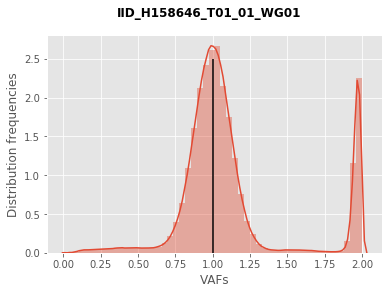

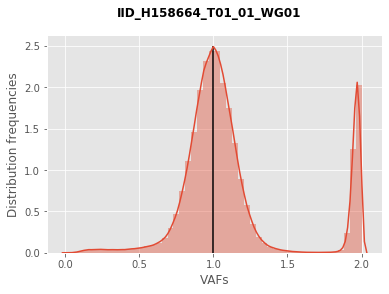

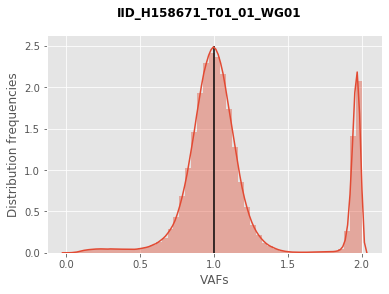

In [16]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[7].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    #plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

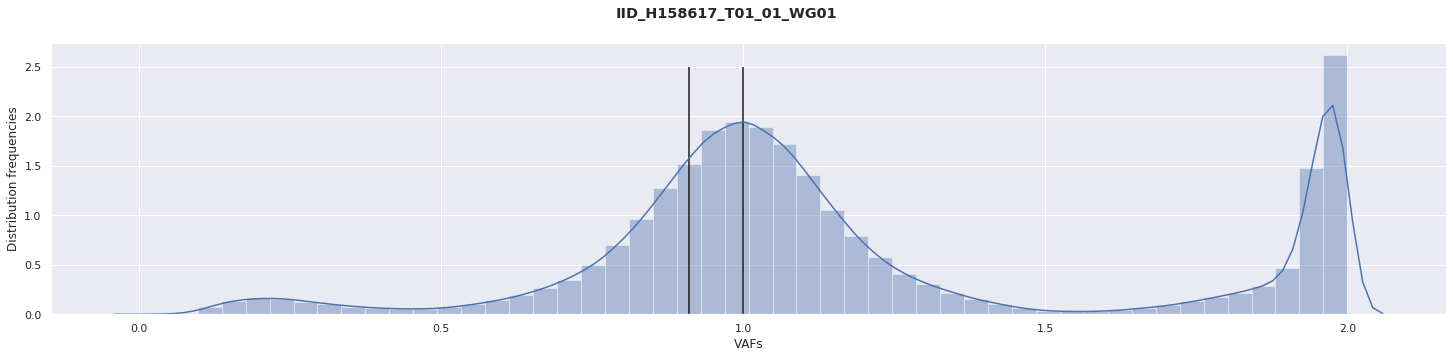

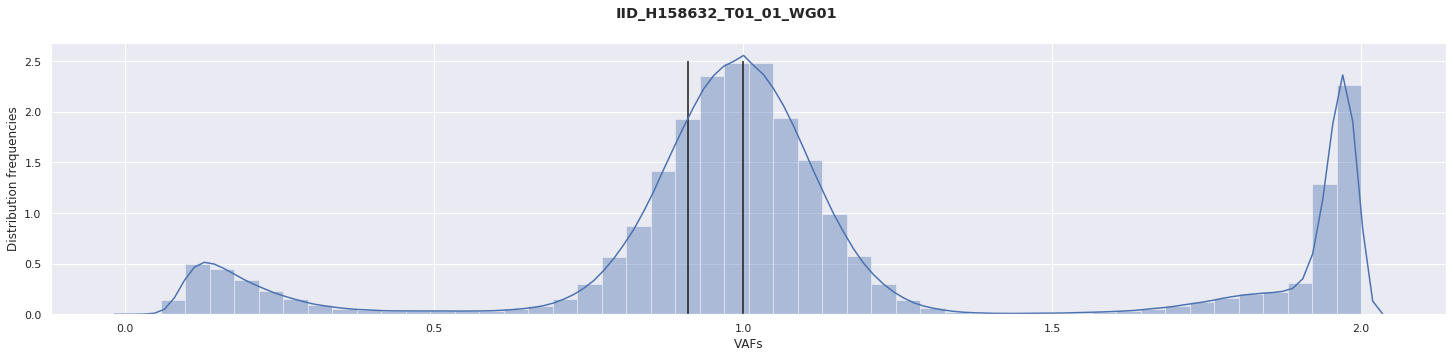

In [248]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()


### - Caveman Flagging:

In [17]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/*flag.vcf.gz'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158664_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all

#### - Problem:
Because I have to launch the pysam command twice in order to obtain an output, I cannot prepare a loop to do all the patients in a row, but go one by one.

In [19]:
#IID_H158609_T01_01_WG01
vcf_in = VariantFile(vcfs[0],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    if(row.__str__().split('\t')[6]=='PASS'):
        vcf_out.write(row)

In [21]:
#IID_H158625_T01_01_WG01
vcf_in = VariantFile(vcfs[1],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    if(row.__str__().split('\t')[6]=='PASS'):
        vcf_out.write(row)

In [23]:
#IID_H158628_T01_01_WG01
vcf_in = VariantFile(vcfs[2],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    if(row.__str__().split('\t')[6]=='PASS'):
        vcf_out.write(row)

In [25]:
#IID_H158636_T01_01_WG01
vcf_in = VariantFile(vcfs[3],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    if(row.__str__().split('\t')[6]=='PASS'):
        vcf_out.write(row)

In [27]:
#IID_H158640_T01_01_WG01
vcf_in = VariantFile(vcfs[4],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    if(row.__str__().split('\t')[6]=='PASS'):
        vcf_out.write(row)

In [29]:
#IID_H158646_T01_01_WG01
vcf_in = VariantFile(vcfs[5],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    if(row.__str__().split('\t')[6]=='PASS'):
        vcf_out.write(row)

In [31]:
#IID_H158664_T01_01_WG01
vcf_in = VariantFile(vcfs[6],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158664_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    if(row.__str__().split('\t')[6]=='PASS'):
        vcf_out.write(row)

In [33]:
#IID_H158671_T01_01_WG01
vcf_in = VariantFile(vcfs[7],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158671_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    if(row.__str__().split('\t')[6]=='PASS'):
        vcf_out.write(row)

- commands_unique:

In [34]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/*flag_pass.vcf.gz'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158664_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',

In [43]:
#lines=[]
for index,n in enumerate(vcfs):
    name=n.split('/')[8].split('_vs_')[0]
    path=os.path.dirname(n)+'/tags_unique/'
    output=path+name+'_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs'
    
    command='zless '+n+' | grep -v \'#\' | awk -F \"\\t\" \'{print $11}\' | awk -F \"\:\" \'{print $3}\' >'+output+' &'
    
    print(command,'\n')
    #lines.append(command)
    
    #with open('/work/isabl/home/gutierj2/uk_all/GRIDDS_unmatched/universal_normal/gridss_commands.sh', 'a') as the_file:
        #the_file.write(command)

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz | grep -v '#' | awk -F "\t" '{print $11}' | awk -F "\:" '{print $3}' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs & 

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz | grep -v '#' | awk -F "\t" '{print $11}' | awk -F "\:" '{print $3}' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs & 

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz | grep -v '#' | awk -F "\t" '{print $11}' | awk -F "\:" '{print $3}' >/work/isabl/home/gutierj2/uk_all/SNVs

In [46]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/*flag_pass.vcf.gz.afs'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSig

In [47]:
#lines=[]
for index,n in enumerate(vcfs):
    output=n+'.unique'
    
    command='less '+n+'| grep -v \',\' >'+output+' &'
    
    print(command,'\n')
    #lines.append(command)
    
    #with open('/work/isabl/home/gutierj2/uk_all/GRIDDS_unmatched/universal_normal/gridss_commands.sh', 'a') as the_file:
        #the_file.write(command)

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs.unique & 

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs.unique & 

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vc

In [49]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/*.snvs_flag_pass.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/tags_unique/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz.afs.unique',
 '/w

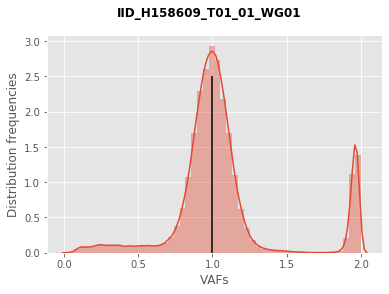

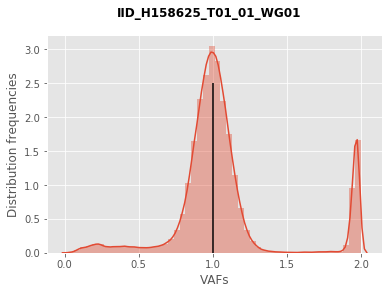

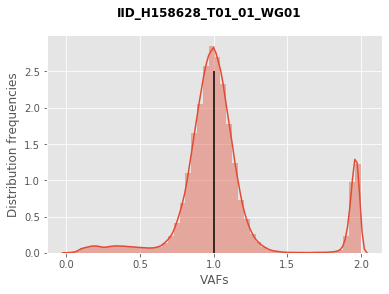

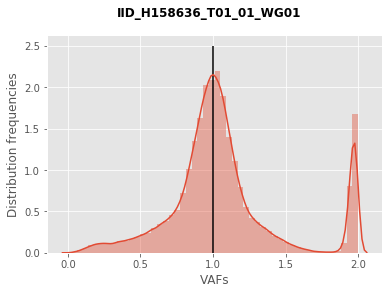

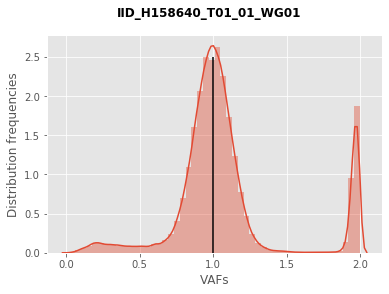

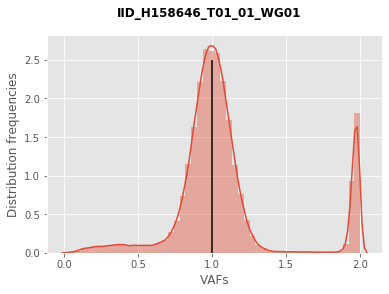

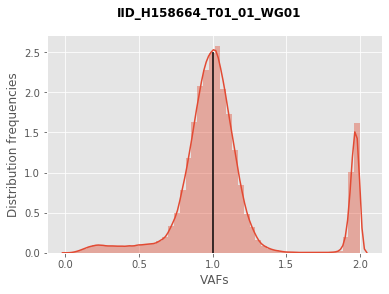

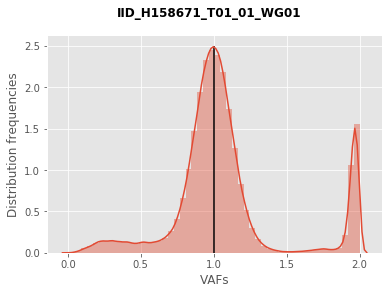

In [52]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[9].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    #plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

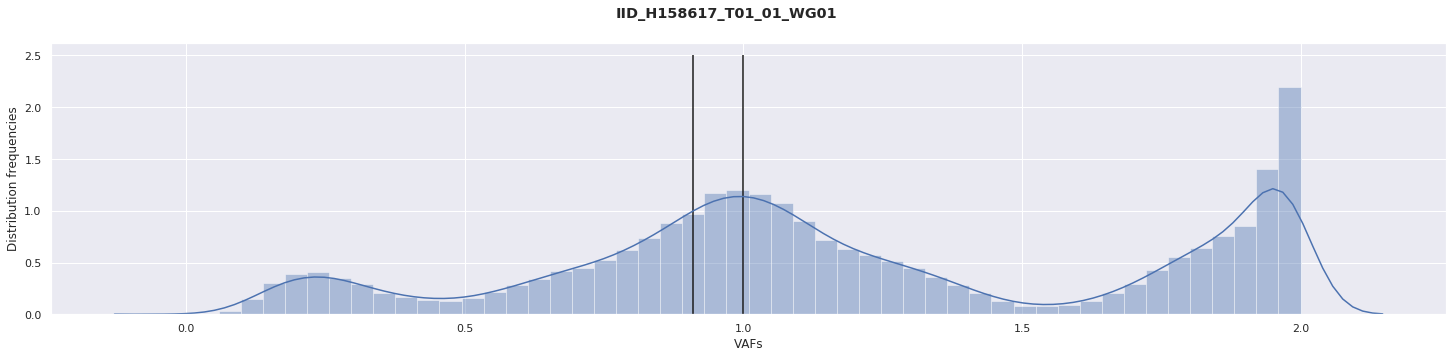

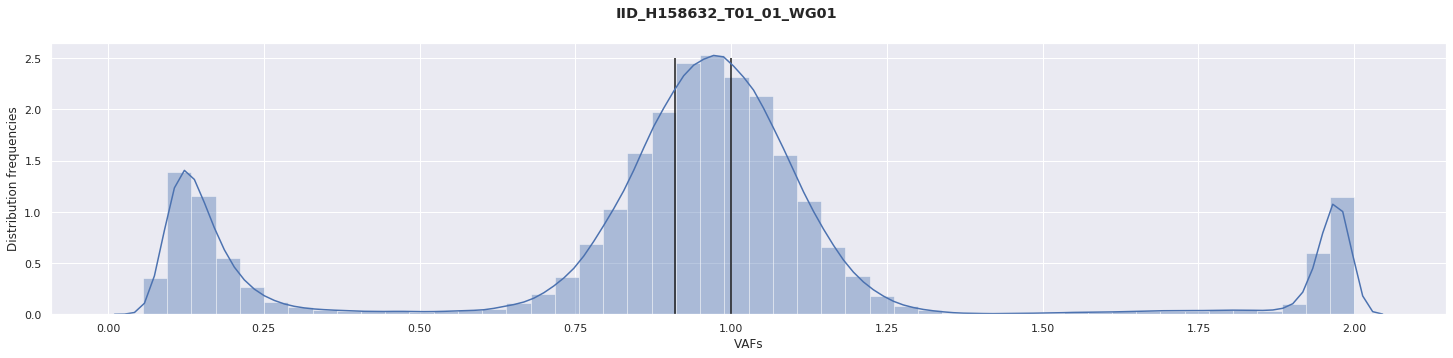

In [251]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show() 


## - dbSNP138

In [53]:
db138='/ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/dbsnp/138/dbsnp_138.b37.vcf.gz'

In [124]:
dbvcf_in=VariantFile(db138,'rb')
dbvcf_out=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz', 'w', header=dbvcf_in.header)

for row in dbvcf_in:
    #print(row.__str__().split('\t')[7])
    if('COMMON=1' in row.__str__().split('\t')[7]):
        if('<' not in row.__str__().split('\t')[4]):
            #print(row)
            dbvcf_out.write(row)

In [54]:
db138_com='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz'

In [55]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/*.snvs_flag_pass.vcf.gz'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158664_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass.vcf.gz',

In [57]:
#IID_H158609_T01_01_WG01
vcf_in = VariantFile(vcfs[0],'rb')  # auto-detect input format
dbvcf_in=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')

vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    chrom=row.__str__().split('\t')[0]
    pos1=int(row.__str__().split('\t')[1])-1
    pos2=int(row.__str__().split('\t')[1])
        
    if(chrom=='hs37d5'):
        next
    else:
        for row2 in dbvcf_in.fetch(str(chrom), int(pos1), int(pos2)):
            if (((row.__str__().split('\t')[0]==row2.__str__().split('\t')[0]) ) & (int(row.__str__().split('\t')[1])==int(row2.__str__().split('\t')[1]))):
                #print(row.__str__().split('\t')[0],row2.__str__().split('\t')[0],int(row.__str__().split('\t')[1]),int(row2.__str__().split('\t')[1]) )
                vcf_out.write(row)
                

In [59]:
#IID_H158625_T01_01_WG01
vcf_in = VariantFile(vcfs[1],'rb')  # auto-detect input format
dbvcf_in=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')

vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    chrom=row.__str__().split('\t')[0]
    pos1=int(row.__str__().split('\t')[1])-1
    pos2=int(row.__str__().split('\t')[1])
        
    if(chrom=='hs37d5'):
        next
    else:
        for row2 in dbvcf_in.fetch(str(chrom), int(pos1), int(pos2)):
            if (((row.__str__().split('\t')[0]==row2.__str__().split('\t')[0]) ) & (int(row.__str__().split('\t')[1])==int(row2.__str__().split('\t')[1]))):
                #print(row.__str__().split('\t')[0],row2.__str__().split('\t')[0],int(row.__str__().split('\t')[1]),int(row2.__str__().split('\t')[1]) )
                vcf_out.write(row)

In [61]:
#IID_H158628_T01_01_WG01
vcf_in = VariantFile(vcfs[2],'rb')  # auto-detect input format
dbvcf_in=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')

vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    chrom=row.__str__().split('\t')[0]
    pos1=int(row.__str__().split('\t')[1])-1
    pos2=int(row.__str__().split('\t')[1])
        
    if(chrom=='hs37d5'):
        next
    else:
        for row2 in dbvcf_in.fetch(str(chrom), int(pos1), int(pos2)):
            if (((row.__str__().split('\t')[0]==row2.__str__().split('\t')[0]) ) & (int(row.__str__().split('\t')[1])==int(row2.__str__().split('\t')[1]))):
                #print(row.__str__().split('\t')[0],row2.__str__().split('\t')[0],int(row.__str__().split('\t')[1]),int(row2.__str__().split('\t')[1]) )
                vcf_out.write(row)

In [63]:
#IID_H158636_T01_01_WG01
vcf_in = VariantFile(vcfs[3],'rb')  # auto-detect input format
dbvcf_in=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')

vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    chrom=row.__str__().split('\t')[0]
    pos1=int(row.__str__().split('\t')[1])-1
    pos2=int(row.__str__().split('\t')[1])
        
    if(chrom=='hs37d5'):
        next
    else:
        for row2 in dbvcf_in.fetch(str(chrom), int(pos1), int(pos2)):
            if (((row.__str__().split('\t')[0]==row2.__str__().split('\t')[0]) ) & (int(row.__str__().split('\t')[1])==int(row2.__str__().split('\t')[1]))):
                #print(row.__str__().split('\t')[0],row2.__str__().split('\t')[0],int(row.__str__().split('\t')[1]),int(row2.__str__().split('\t')[1]) )
                vcf_out.write(row)

In [69]:
#IID_H158640_T01_01_WG01
vcf_in = VariantFile(vcfs[4],'rb')  # auto-detect input format
dbvcf_in=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')

vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    chrom=row.__str__().split('\t')[0]
    pos1=int(row.__str__().split('\t')[1])-1
    pos2=int(row.__str__().split('\t')[1])
        
    if(chrom=='hs37d5'):
        next
    else:
        for row2 in dbvcf_in.fetch(str(chrom), int(pos1), int(pos2)):
            if (((row.__str__().split('\t')[0]==row2.__str__().split('\t')[0]) ) & (int(row.__str__().split('\t')[1])==int(row2.__str__().split('\t')[1]))):
                #print(row.__str__().split('\t')[0],row2.__str__().split('\t')[0],int(row.__str__().split('\t')[1]),int(row2.__str__().split('\t')[1]) )
                vcf_out.write(row)

In [71]:
#IID_H158646_T01_01_WG01
vcf_in = VariantFile(vcfs[5],'rb')  # auto-detect input format
dbvcf_in=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')

vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    chrom=row.__str__().split('\t')[0]
    pos1=int(row.__str__().split('\t')[1])-1
    pos2=int(row.__str__().split('\t')[1])
        
    if(chrom=='hs37d5'):
        next
    else:
        for row2 in dbvcf_in.fetch(str(chrom), int(pos1), int(pos2)):
            if (((row.__str__().split('\t')[0]==row2.__str__().split('\t')[0]) ) & (int(row.__str__().split('\t')[1])==int(row2.__str__().split('\t')[1]))):
                #print(row.__str__().split('\t')[0],row2.__str__().split('\t')[0],int(row.__str__().split('\t')[1]),int(row2.__str__().split('\t')[1]) )
                vcf_out.write(row)

In [73]:
#IID_H158664_T01_01_WG01
vcf_in = VariantFile(vcfs[6],'rb')  # auto-detect input format
dbvcf_in=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')

vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158664_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    chrom=row.__str__().split('\t')[0]
    pos1=int(row.__str__().split('\t')[1])-1
    pos2=int(row.__str__().split('\t')[1])
        
    if(chrom=='hs37d5'):
        next
    else:
        for row2 in dbvcf_in.fetch(str(chrom), int(pos1), int(pos2)):
            if (((row.__str__().split('\t')[0]==row2.__str__().split('\t')[0]) ) & (int(row.__str__().split('\t')[1])==int(row2.__str__().split('\t')[1]))):
                #print(row.__str__().split('\t')[0],row2.__str__().split('\t')[0],int(row.__str__().split('\t')[1]),int(row2.__str__().split('\t')[1]) )
                vcf_out.write(row)

In [75]:
#IID_H158671_T01_01_WG01
vcf_in = VariantFile(vcfs[7],'rb')  # auto-detect input format
dbvcf_in=VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/dbsnp_138.b37_common.vcf.gz','rb')

vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158671_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp.vcf.gz', 'w', header=vcf_in.header)

for row in vcf_in:
    chrom=row.__str__().split('\t')[0]
    pos1=int(row.__str__().split('\t')[1])-1
    pos2=int(row.__str__().split('\t')[1])
        
    if(chrom=='hs37d5'):
        next
    else:
        for row2 in dbvcf_in.fetch(str(chrom), int(pos1), int(pos2)):
            if (((row.__str__().split('\t')[0]==row2.__str__().split('\t')[0]) ) & (int(row.__str__().split('\t')[1])==int(row2.__str__().split('\t')[1]))):
                #print(row.__str__().split('\t')[0],row2.__str__().split('\t')[0],int(row.__str__().split('\t')[1]),int(row2.__str__().split('\t')[1]) )
                vcf_out.write(row)

#### - [IMPORTANT]: Use of fgrep to filter the variants that have been annotated as common in dbSNP.

- commands_unique:

In [76]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/*flag_pass_dbsnp_filter.vcf.gz'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_st

In [78]:
#lines=[]
for index,n in enumerate(vcfs):
    name=n.split('/')[8].split('_vs_')[0]
    path=os.path.dirname(n)+'/dbsnp_uniques/'
    output=path+name+'_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs'
    
    command='zless '+n+' | grep -v \'#\' | awk -F \"\\t\" \'{print $11}\' | awk -F \"\:\" \'{print $3}\' >'+output+' &'
    
    print(command,'\n')
    #lines.append(command)
    
    #with open('/work/isabl/home/gutierj2/uk_all/GRIDDS_unmatched/universal_normal/gridss_commands.sh', 'a') as the_file:
        #the_file.write(command)

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz | grep -v '#' | awk -F "\t" '{print $11}' | awk -F "\:" '{print $3}' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs & 

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz | grep -v '#' | awk -F "\t" '{print $11}' | awk -F "\:" '{print $3}' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs & 

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz | grep -v '#' | awk -F "\t" '{print $1

In [79]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/*flag_pass_dbsnp_filter.vcf.gz.afs'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG

In [80]:
#lines=[]
for index,n in enumerate(vcfs):
    output=n+'.unique'
    
    command='less '+n+'| grep -v \',\' >'+output+' &'
    
    print(command,'\n')
    #lines.append(command)
    
    #with open('/work/isabl/home/gutierj2/uk_all/GRIDDS_unmatched/universal_normal/gridss_commands.sh', 'a') as the_file:
        #the_file.write(command)

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs.unique & 

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs.unique & 

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp

In [83]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/*flag_pass_dbsnp_filter.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/dbsnp_uniques/IID_H158646_T

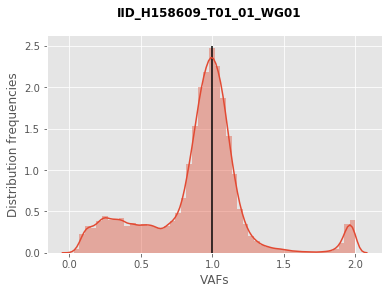

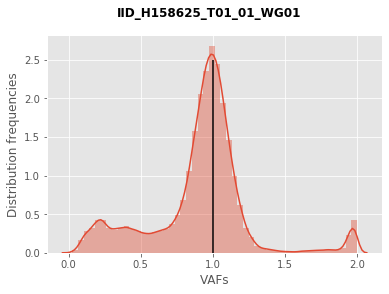

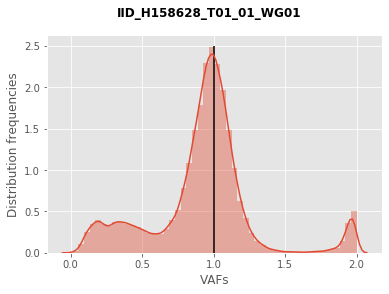

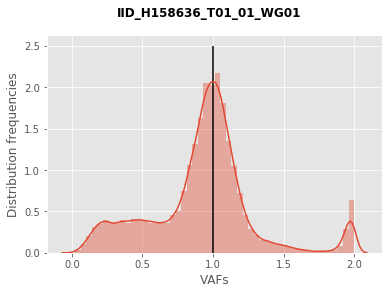

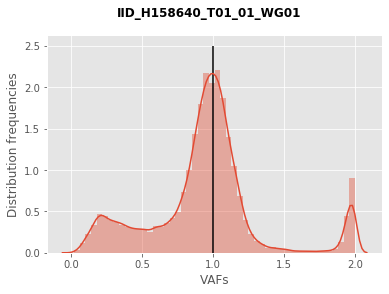

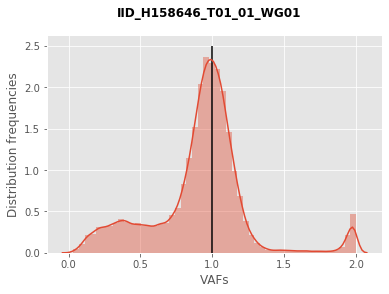

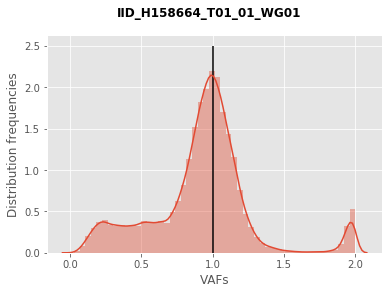

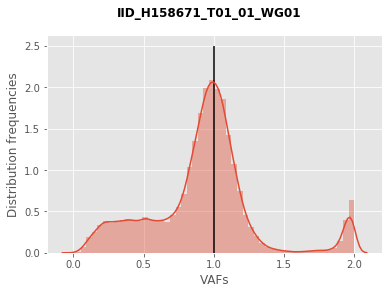

In [84]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[9].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    #plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

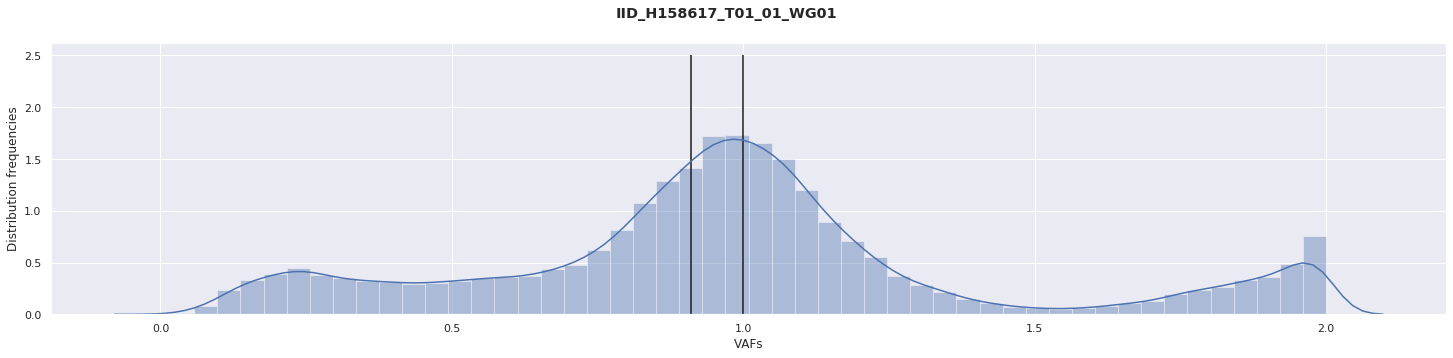

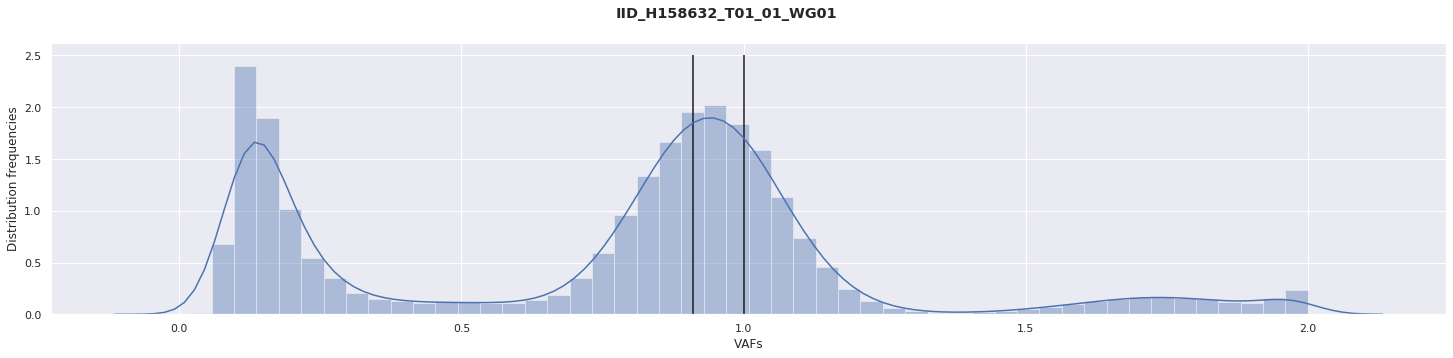

In [253]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()    


### EXOME coordinates:

In [85]:
import pysam

In [86]:
from pysam import VariantFile

- Exome bed:

In [87]:
EXOME_BED = pd.read_csv("/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/exome/GRCh37_EXON.bed_chrs.bed",sep='\t',header=None, names=['chr','start','end','name','num','strand'])

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
EXOME_BED.head()

,chr,start,end,name,num,strand
0,1,11873,12227,uc001aaa.3_exon_0_0_chr1_11874_f,0,+
1,1,11873,12227,uc010nxq.1_exon_0_0_chr1_11874_f,0,+
2,1,11873,12227,uc010nxr.1_exon_0_0_chr1_11874_f,0,+
3,1,12594,12721,uc010nxq.1_exon_1_0_chr1_12595_f,0,+
4,1,12612,12721,uc001aaa.3_exon_1_0_chr1_12613_f,0,+


In [89]:
EXOME_BED_coor=EXOME_BED[['chr','start','end']].drop_duplicates()

In [90]:
EXOME_BED_coor.head()

,chr,start,end
0,1,11873,12227
3,1,12594,12721
4,1,12612,12721
5,1,12645,12697
6,1,13220,14409


- fetch:

In [93]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/*flag_pass_dbsnp_filter.vcf.gz'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_st

In [95]:
#IID_H158609_T01_01_WG01
vcf_in = VariantFile(vcfs[0],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz', 'w', header=vcf_in.header)

for index,row in EXOME_BED_coor.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [124]:
#IID_H158625_T01_01_WG01
vcf_in = VariantFile(vcfs[1],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz', 'w', header=vcf_in.header)

for index,row in EXOME_BED_coor.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [99]:
#IID_H158628_T01_01_WG01
vcf_in = VariantFile(vcfs[2],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz', 'w', header=vcf_in.header)

for index,row in EXOME_BED_coor.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [101]:
#IID_H158636_T01_01_WG01
vcf_in = VariantFile(vcfs[3],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz', 'w', header=vcf_in.header)

for index,row in EXOME_BED_coor.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [103]:
#IID_H158640_T01_01_WG01
vcf_in = VariantFile(vcfs[4],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz', 'w', header=vcf_in.header)

for index,row in EXOME_BED_coor.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [105]:
#IID_H158646_T01_01_WG01
vcf_in = VariantFile(vcfs[5],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz', 'w', header=vcf_in.header)

for index,row in EXOME_BED_coor.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [107]:
#IID_H158664_T01_01_WG01
vcf_in = VariantFile(vcfs[6],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158664_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz', 'w', header=vcf_in.header)

for index,row in EXOME_BED_coor.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [109]:
#IID_H158671_T01_01_WG01
vcf_in = VariantFile(vcfs[7],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158671_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz', 'w', header=vcf_in.header)

for index,row in EXOME_BED_coor.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

- commands_unique:

In [110]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/*flagged_pass_dbsnp_filter_ex.vcf.gz'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158

In [111]:
#lines=[]
for index,n in enumerate(vcfs):
    name=n.split('/')[8].split('_vs_')[0]
    path=os.path.dirname(n)+'/ex_uniques/'
    output=path+name+'_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs'
    
    command='zless '+n+' | grep -v \'#\' | awk -F \"\\t\" \'{print $11}\' | awk -F \"\:\" \'{print $3}\' >'+output+' &'
    
    print(command,'\n')
    #lines.append(command)
    
    #with open('/work/isabl/home/gutierj2/uk_all/GRIDDS_unmatched/universal_normal/gridss_commands.sh', 'a') as the_file:
        #the_file.write(command)

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz | grep -v '#' | awk -F "\t" '{print $11}' | awk -F "\:" '{print $3}' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs & 

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz | grep -v '#' | awk -F "\t" '{print $11}' | awk -F "\:" '{print $3}' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs & 

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_ex.vcf.gz | grep -v '#' | awk -F "\t" '{print $11}' | 

In [112]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/*flag_pass_dbsnp_filter_ex.vcf.gz.afs'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.

In [113]:
#lines=[]
for index,n in enumerate(vcfs):
    output=n+'.unique'
    
    command='less '+n+'| grep -v \',\' >'+output+' &'
    
    print(command,'\n')
    #lines.append(command)
    
    #with open('/work/isabl/home/gutierj2/uk_all/GRIDDS_unmatched/universal_normal/gridss_commands.sh', 'a') as the_file:
        #the_file.write(command)

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs.unique & 

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs.unique & 

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_un

In [114]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/*flag_pass_dbsnp_filter_ex.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_ex.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/ex_uniques/IID_H158646_T01_

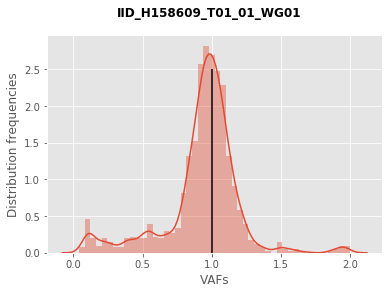

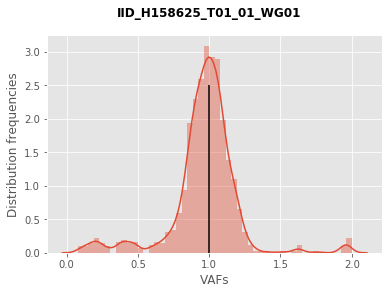

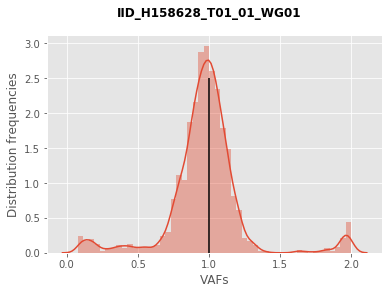

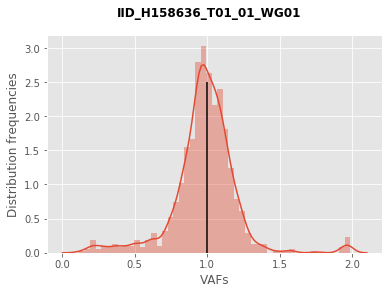

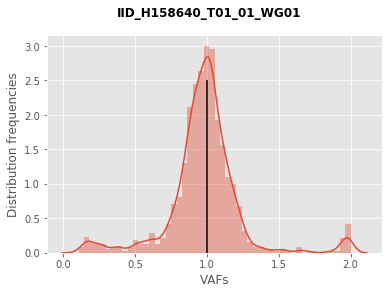

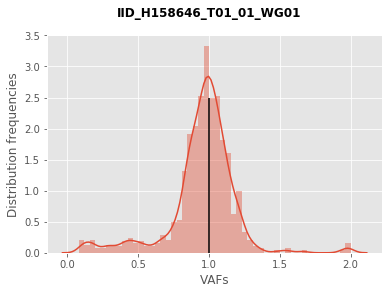

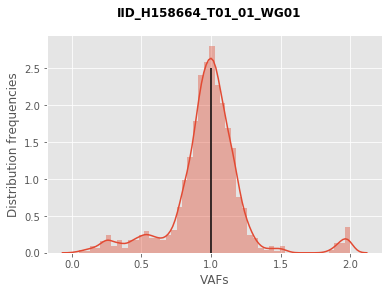

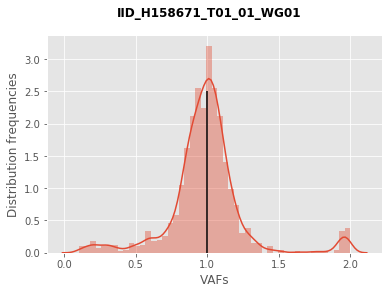

In [118]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[9].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    #plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

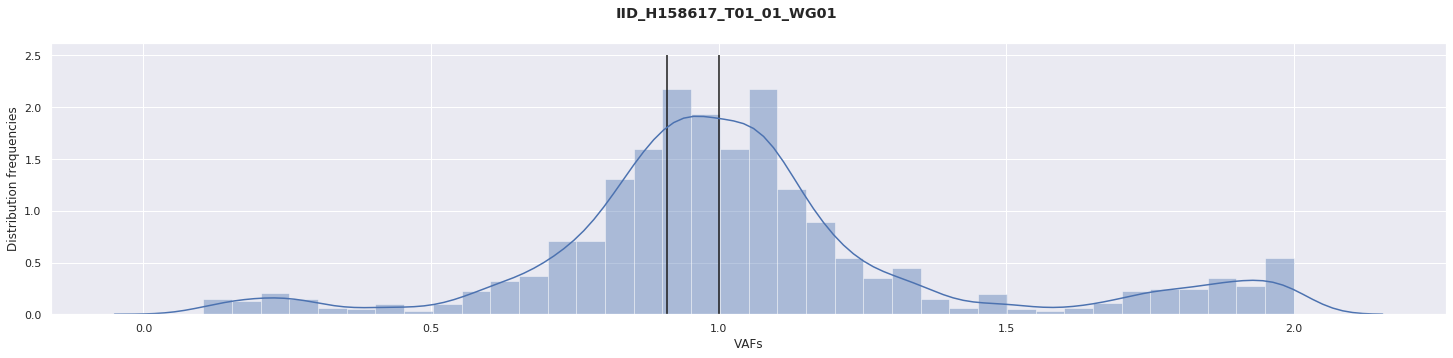

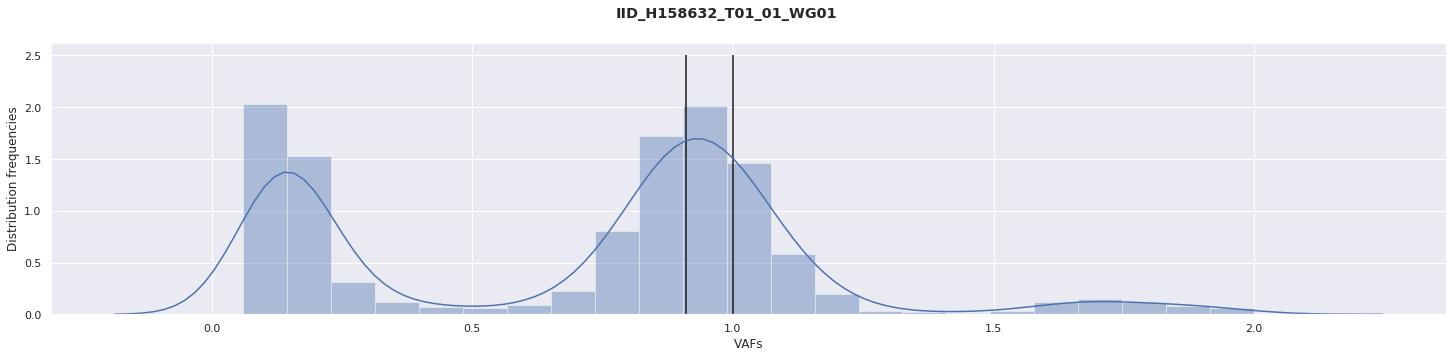

In [255]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()    


### - GENES:

In [125]:
GENES_BED = pd.read_csv("/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/Human.GRCh37.gene_regions.bed",sep='\t',header=None, names=['chr','start','end'])

In [126]:
GENES_BED.head()

,chr,start,end
0,1,24553,41081
1,1,64090,75008
2,1,84294,178862
3,1,222614,272253
4,1,312719,466954


- fetch:

In [127]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/*flag_pass_dbsnp_filter.vcf.gz'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_st

In [131]:
#IID_H158609_T01_01_WG01
vcf_in = VariantFile(vcfs[0],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [133]:
#IID_H158625_T01_01_WG01
vcf_in = VariantFile(vcfs[1],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [135]:
#IID_H158628_T01_01_WG01
vcf_in = VariantFile(vcfs[2],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [137]:
#IID_H158636_T01_01_WG01
vcf_in = VariantFile(vcfs[3],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [139]:
#IID_H158640_T01_01_WG01
vcf_in = VariantFile(vcfs[4],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [141]:
#IID_H158646_T01_01_WG01
vcf_in = VariantFile(vcfs[5],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [143]:
#IID_H158664_T01_01_WG01
vcf_in = VariantFile(vcfs[6],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158664_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [145]:
#IID_H158671_T01_01_WG01
vcf_in = VariantFile(vcfs[7],'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158671_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

- commands_unique:

In [146]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/*flagged_pass_dbsnp_filter_genes.vcf.gz'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158636_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158640_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158646_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclo

In [147]:
#lines=[]
for index,n in enumerate(vcfs):
    name=n.split('/')[8].split('_vs_')[0]
    path=os.path.dirname(n)+'/genes_uniques/'
    output=path+name+'_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs'
    
    command='zless '+n+' | grep -v \'#\' | awk -F \"\\t\" \'{print $11}\' | awk -F \"\:\" \'{print $3}\' >'+output+' &'
    
    print(command,'\n')
    #lines.append(command)
    
    #with open('/work/isabl/home/gutierj2/uk_all/GRIDDS_unmatched/universal_normal/gridss_commands.sh', 'a') as the_file:
        #the_file.write(command)

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158609_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz | grep -v '#' | awk -F "\t" '{print $11}' | awk -F "\:" '{print $3}' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs & 

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158625_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz | grep -v '#' | awk -F "\t" '{print $11}' | awk -F "\:" '{print $3}' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs & 

zless /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/IID_H158628_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_genes.vcf.gz | grep -v '#' | awk -F 

In [148]:
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/*flag_pass_dbsnp_filter_genes.vcf.gz.afs'
vcfs=!ls -v {path}
vcfs

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158646_T01_01

In [149]:
#lines=[]
for index,n in enumerate(vcfs):
    output=n+'.unique'
    
    command='less '+n+'| grep -v \',\' >'+output+' &'
    
    print(command,'\n')
    #lines.append(command)
    
    #with open('/work/isabl/home/gutierj2/uk_all/GRIDDS_unmatched/universal_normal/gridss_commands.sh', 'a') as the_file:
        #the_file.write(command)

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs.unique & 

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs.unique & 

less /work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs| grep -v ',' >/work/isabl/home/gutierj2/uk_all/SNVs_Mut

In [150]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/*flag_pass_dbsnp_filter_genes.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158609_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158625_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158628_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158636_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_strct/genes_uniques/IID_H158640_T01_01_WG01_vs_IID_H158604_N01_01_WG01.snvs_flag_pass_dbsnp_filter_genes.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/subclonal_str

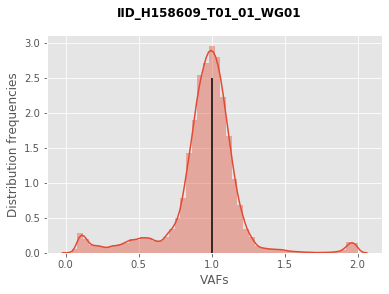

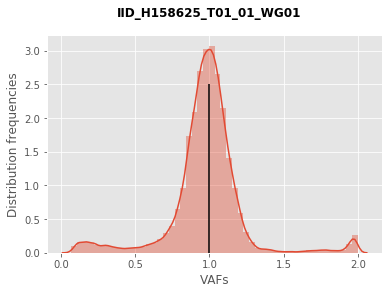

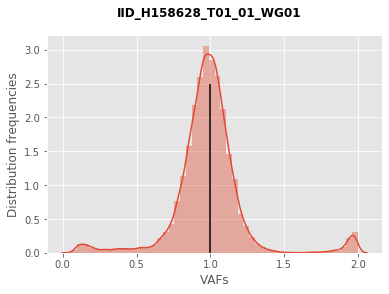

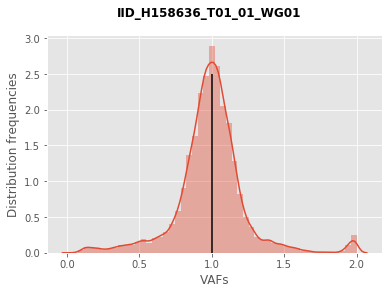

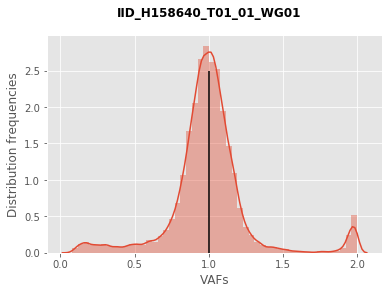

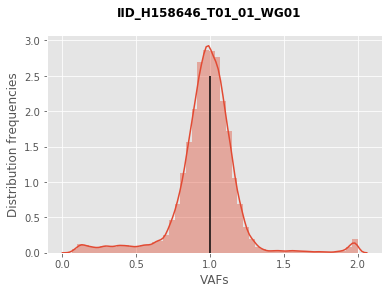

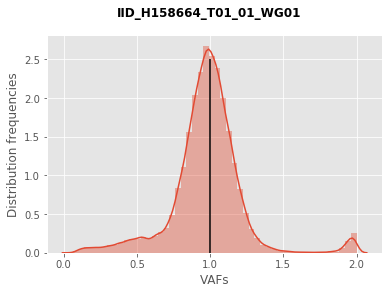

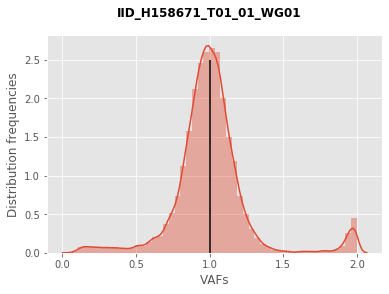

In [151]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[9].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    #plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

- fetch: I don't know why but with pysam there are at least two times the number of launchings of the same window in order to obtain the vcf with pysam.

In [258]:
vcf17='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz'
vcf32='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header.vcf.gz'

In [261]:
#IID_H158617_T01_01_WG01
vcf_in = VariantFile(vcf17,'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_flag/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [264]:
#IID_H158632_T01_01_WG01
vcf_in = VariantFile(vcf32,'rb')  # auto-detect input format
vcf_out = VariantFile('/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_flag/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_genes.vcf.gz', 'w', header=vcf_in.header)

for index,row in GENES_BED.iterrows():
    for read in vcf_in.fetch(contig=str(row['chr']), start=int(row['start']), end=int(row['end'])):
        vcf_out.write(read)

In [265]:
#Plots
path='/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/*.flagged_pass_dbsnp_filter_header_genes.vcf.gz.afs.unique'
uniques=!ls -v {path}
uniques

['/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158617_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_genes.vcf.gz.afs.unique',
 '/work/isabl/home/gutierj2/uk_all/SNVs_MutSigs_Joe/dan_sigs/IID_H158632_T01_01_WG01_vs_I-H-135420-N1-1-D1-1.flagged_pass_dbsnp_filter_header_genes.vcf.gz.afs.unique']

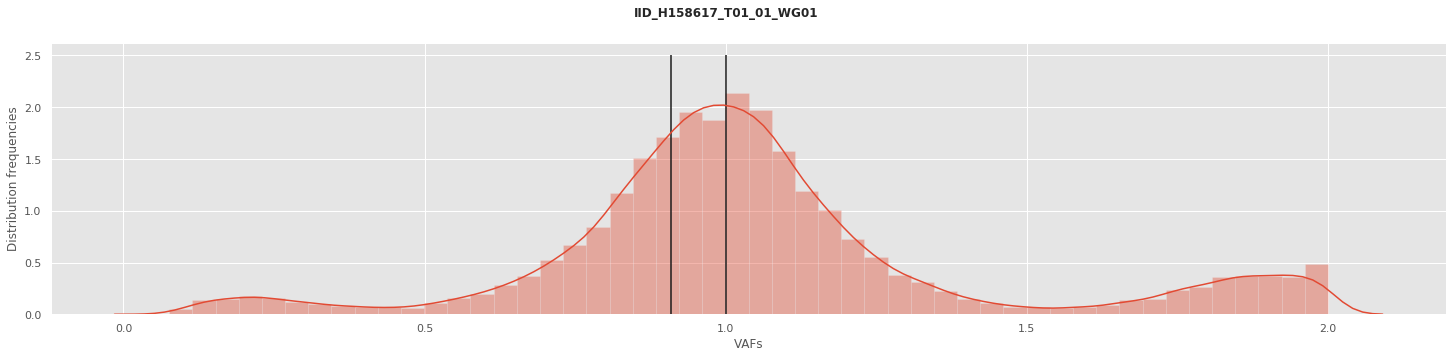

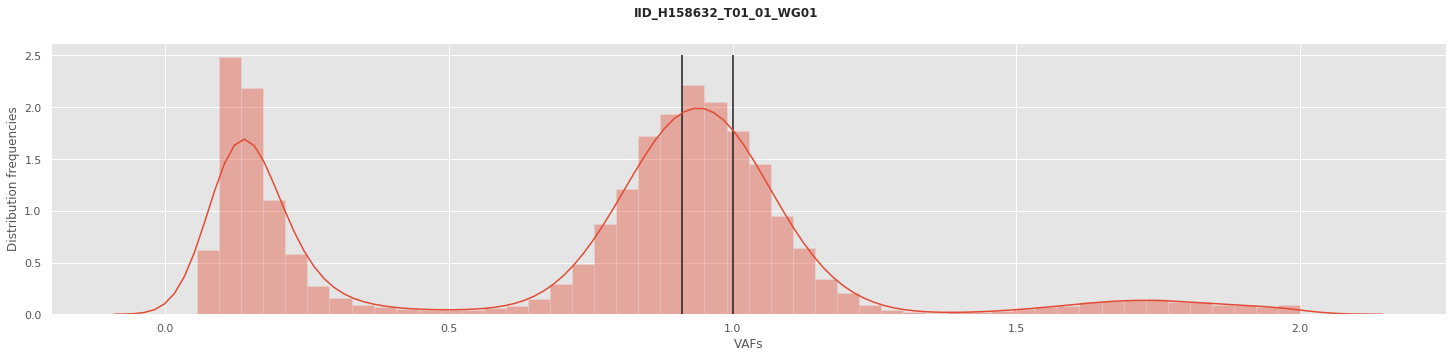

In [266]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()

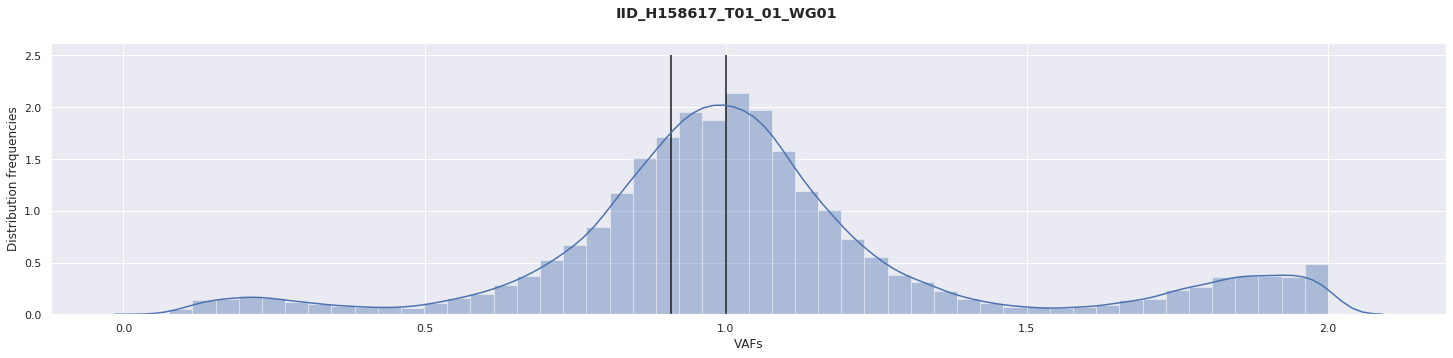

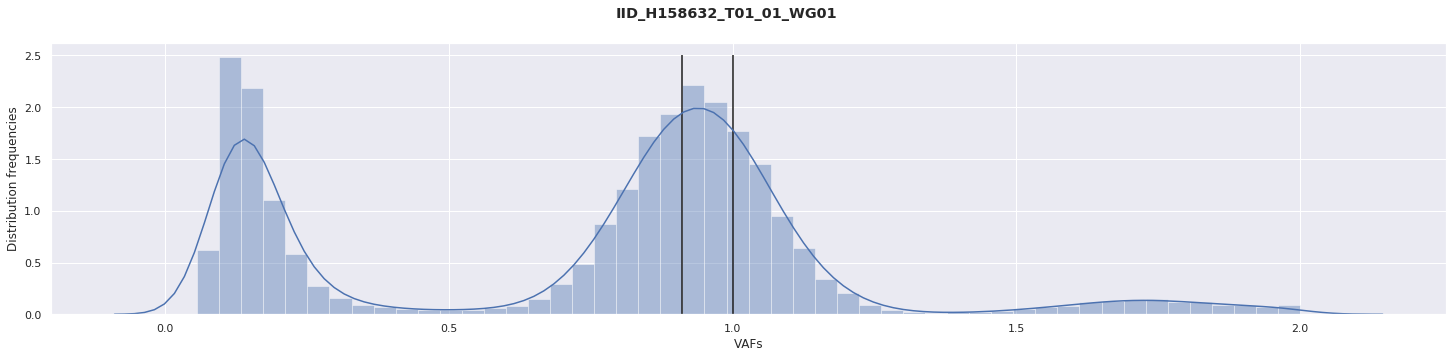

In [267]:
for afs in uniques:
    tsv=pd.read_csv(afs,sep='\t',header=None,names=['afs'])
    bafs=[]
    
    for index,line in tsv.iterrows():
        baf=float(line['afs']*2)
        bafs.append(baf)
    
    data = np.asarray(bafs)
    plt.style.use(style="ggplot")
    sns.set(rc={'figure.figsize':(25,5)})
    plt.xlabel("VAFs")
    plt.ylabel("Distribution frequencies")
    name=afs.split('/')[8].split('_vs_')[0]
    plt.suptitle(name,weight='bold')
    sns.distplot(data)
    plt.vlines(0.91, 0, 2.5)
    plt.vlines(1, 0, 2.5)
    plt.show()    
